<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports-and-plot-settings" data-toc-modified-id="Imports-and-plot-settings-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports and plot settings</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Functions</a></span></li><li><span><a href="#K-Fold" data-toc-modified-id="K-Fold-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>K-Fold</a></span></li><li><span><a href="#Group-K-Fold" data-toc-modified-id="Group-K-Fold-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Group K-Fold</a></span><ul class="toc-item"><li><span><a href="#5-vs-10-folds" data-toc-modified-id="5-vs-10-folds-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>5 vs 10 folds</a></span></li><li><span><a href="#Down-sample-major-epitope-groups" data-toc-modified-id="Down-sample-major-epitope-groups-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Down-sample major epitope groups</a></span><ul class="toc-item"><li><span><a href="#5-vs-10" data-toc-modified-id="5-vs-10-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>5 vs 10</a></span></li></ul></li></ul></li><li><span><a href="#Leave-One-Group-Out" data-toc-modified-id="Leave-One-Group-Out-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Leave One Group Out</a></span></li><li><span><a href="#Group-Shuffle-Split" data-toc-modified-id="Group-Shuffle-Split-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Group Shuffle Split</a></span><ul class="toc-item"><li><span><a href="#Down-sample" data-toc-modified-id="Down-sample-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Down-sample</a></span></li></ul></li><li><span><a href="#Overall-comparison" data-toc-modified-id="Overall-comparison-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Overall comparison</a></span><ul class="toc-item"><li><span><a href="#K-vs-Shuffle-vs-Group-vs-Group-Shuffle" data-toc-modified-id="K-vs-Shuffle-vs-Group-vs-Group-Shuffle-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>K vs Shuffle vs Group vs Group Shuffle</a></span></li><li><span><a href="#Group-K-Fold-and-down-sampling" data-toc-modified-id="Group-K-Fold-and-down-sampling-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Group K Fold and down sampling</a></span></li></ul></li></ul></div>

# Imports and plot settings

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import (
    GroupKFold,
    GroupShuffleSplit,
    KFold,
    ShuffleSplit,
    LeaveOneGroupOut
)

from src.config import PROJECT_ROOT
from src.data.vdjdb_source import VdjdbSource

data_path=PROJECT_ROOT / "data/interim/vdjdb-2020-01-20/vdjdb-human-tra-trb-no10x.csv"

data_source = VdjdbSource(filepath=data_path)

data_source_array = np.array(list(data_source))

df = data_source.data
df.sort_values(by="antigen.epitope", inplace=True)
df["y"] = 1
df["pair"] = data_source_array[:,0]

In [2]:
from matplotlib import pyplot as plt
from matplotlib.patches import Patch
from matplotlib.gridspec import GridSpec
import seaborn as sns
sns.set_palette("Set1")
sns.set_style('darkgrid')
plt.rcParams['patch.edgecolor'] = '0.2'
plt.rcParams['patch.linewidth'] = '.8'

# set font style
plt.rcParams.update({'font.size': 11})
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = "Source Sans Pro" #['Fira Sans', 'Source Sans Pro']
font = {'weight' : 'normal'}#,'size'   : 22}

In [3]:
df

,cdr3,antigen.epitope,y,pair
19486,CASSLSFGTEAFF,AAGIGILTV,1,"(CSVWGTGKTYEQYF, FLKEKGGL)"
19489,CAGGTGNQFYF,AAGIGILTV,1,"(CSVWGEGRSYEQYF, FLKEKGGL)"
19490,CAISEVGVGQPQHF,AAGIGILTV,1,"(CSATILAGVPYGEQYF, FLKEKGGL)"
19414,CAVSRAGAGSYQLTF,AAVVRFQEAANKQKQ,1,"(CSASEGTSSYEQYF, FLKEKGGL)"
19415,CSARAGGGEAKNIQYF,AAVVRFQEAANKQKQ,1,"(CASSFDREVTGELFF, FLKEKGGL)"
...,...,...,...,...
17746,CSANDRSYNEQFF,YVLDHLIVV,1,"(CASVTGSTDTQYF, ELKRKMIYM)"
17745,CASSLHFEVEKLFF,YVLDHLIVV,1,"(CASSDGTAYEQYF, ELKRKMIYM)"
909,CSAPVPPYNEQFF,YVLDHLIVV,1,"(CASSLARNQPQHF, CVETMCNEY)"
1066,CASTVQGRETQYF,YVLDHLIVV,1,"(CASGGADMKTEAFF, CVETMCNEY)"


# Functions

In [4]:
def plot_epitopes(index_train, index_test, df):
#     fig, ax = plt.subplots()
#     plt.xticks(rotation=45, ha="right")
#     sns.countplot(ax=ax, x='antigen.epitope', 
#                        order=df.loc[index, "antigen.epitope"].value_counts().iloc[:20].index, 
#                        data=df.iloc[index], 
#                        edgecolor=".2", linewidth=.5, alpha=.75, color=sns.color_palette("Set1")[1])
#     ax.set_title(f'Epitope counts for  set.')
#     plt.show()

    fig = plt.figure(figsize=(15,5), constrained_layout=True)#, dpi=150)#, dpi=200)#, figsize=(10,5))
    gs = GridSpec(1, 2, figure=fig)
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])
        
    sns.countplot(ax=ax1,
                  x='antigen.epitope',
                  order=df.loc[index_train, "antigen.epitope"].value_counts().iloc[:20].index, 
                  data=df.iloc[index_train], 
                  edgecolor=".2", linewidth=.5, alpha=.75, color=sns.color_palette("Set1")[1])
#     ax1.tick_params(labelrotation=90)
    ax1.set_title('Epitope count for train set')
    ax1.set_xlabel('Epitope')
    ax1.set_ylabel("Count")
    plt.setp(ax1.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    
    sns.countplot(ax=ax2,
                  x='antigen.epitope', 
                  order=df.loc[index_test, "antigen.epitope"].value_counts().iloc[:20].index, 
                  data=df.iloc[index_test], 
                  edgecolor=".2", linewidth=.5, alpha=.75, color=sns.color_palette("Set1")[1])
#     ax2.tick_params(labelrotation=45)
    ax2.set_title('Epitope count for test set')
    ax2.set_xlabel('Epitope')
    ax2.set_ylabel("Count")
    plt.setp(ax2.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

#     ax2.set(yscale="log")
    
    plt.show()

    
def fold_analysis(iteration, train_index, test_index, df, plot=True):
    print(f"Iteration {iteration}\n")

    print(f"Size of train set: {len(train_index)}")
    print(f"Size of test set: {len(test_index)}")
    
    print(f"Train to test ratio: {round(len(train_index) / df.shape[0], 2)} : {round(len(test_index) / df.shape[0], 2)} ")

    unique_train_epitopes = df.loc[train_index, "antigen.epitope"].unique().shape[0]
    print(f"Unique epitopes in train set: {unique_train_epitopes}")
    unique_test_epitopes = df.loc[test_index, "antigen.epitope"].unique().shape[0]
    print(f"Unique epitopes in test set: {unique_test_epitopes}")

    if plot:
        plot_epitopes(train_index, test_index, df)
    
    print("---------------------------------")

In [39]:
np.random.seed(13348)
# cmap_data = plt.cm.Paired
cmap_data = plt.cm.tab20c
cmap_cv = plt.cm.coolwarm

def plot_cv_indices_epitope(cv, X, y, group, ax, n_splits, lw=30):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=group)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0
        
#         print("Unique epitopes in test set: ", np.unique(group[tt]))

        # Visualize the results
        ax.scatter(range(len(indices)), [ii + .5] * len(indices),
                   c=indices, marker='_', lw=lw, cmap=cmap_cv,
                   vmin=-.2, vmax=1.2)

    # Plot the data classes and groups at the end
    ax.scatter(range(len(X)), [ii + 1.5] * len(X),
               c=y, marker='_', lw=lw, cmap=cmap_data)
    
    # create color map that cycles for groups
    color_dict = { i : cmap_data.colors[i%len(cmap_data.colors)] for i in np.unique(groups) }
    color_list = [color_dict[i] for i in groups]
    ax.scatter(range(len(X)), [ii + 2.5] * len(X),marker='_', lw=lw, color=color_list)

    # Formatting
    yticklabels = list(range(n_splits)) + ['class', 'group']
    ax.set(yticks=np.arange(n_splits+2) + .5, yticklabels=yticklabels,
           xlabel='Sample index', ylabel="CV iteration",
           ylim=[n_splits+2.2, -.2], xlim=[0, len(X)])
    ax.set_title('{}'.format(type(cv).__name__), fontsize=15)
    return ax

# K-Fold

Using a K-Fold (k = 5) cross-validation strategy with the following settings:
KFold(n_splits=5, random_state=42, shuffle=True)
Iteration 0

Size of train set: 17758
Size of test set: 4440
Train to test ratio: 0.8 : 0.2 
Unique epitopes in train set: 156
Unique epitopes in test set: 118


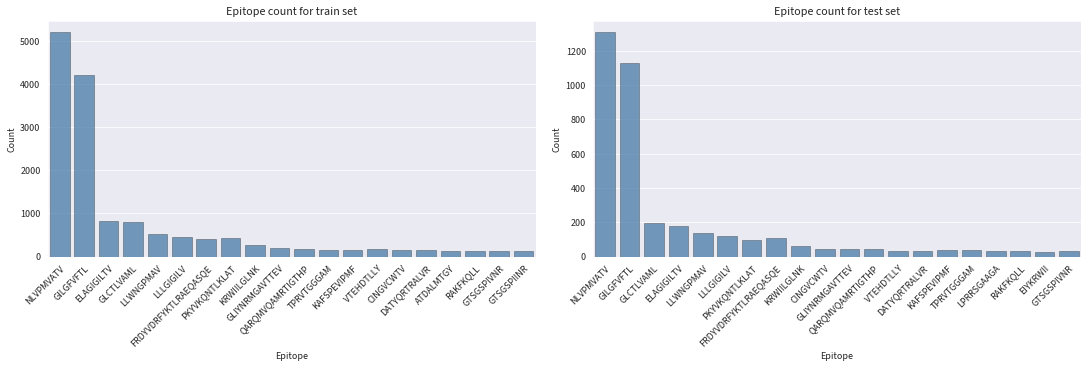

---------------------------------
Iteration 1

Size of train set: 17758
Size of test set: 4440
Train to test ratio: 0.8 : 0.2 
Unique epitopes in train set: 161
Unique epitopes in test set: 121


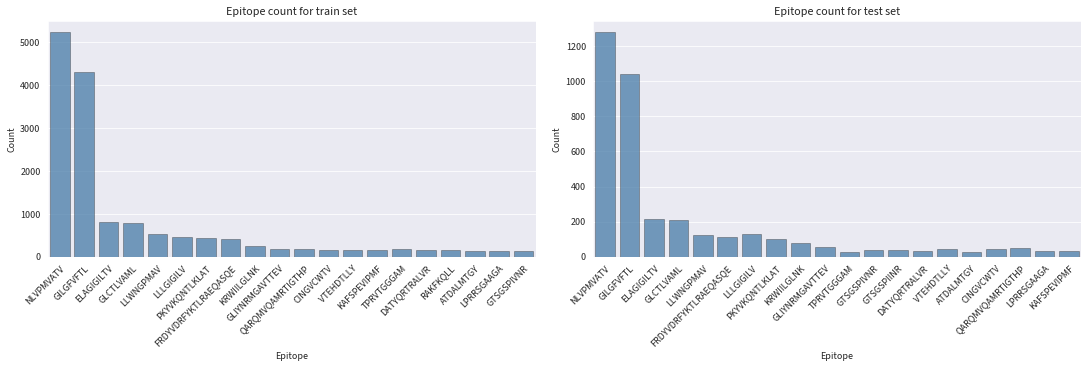

---------------------------------
Iteration 2

Size of train set: 17758
Size of test set: 4440
Train to test ratio: 0.8 : 0.2 
Unique epitopes in train set: 161
Unique epitopes in test set: 123


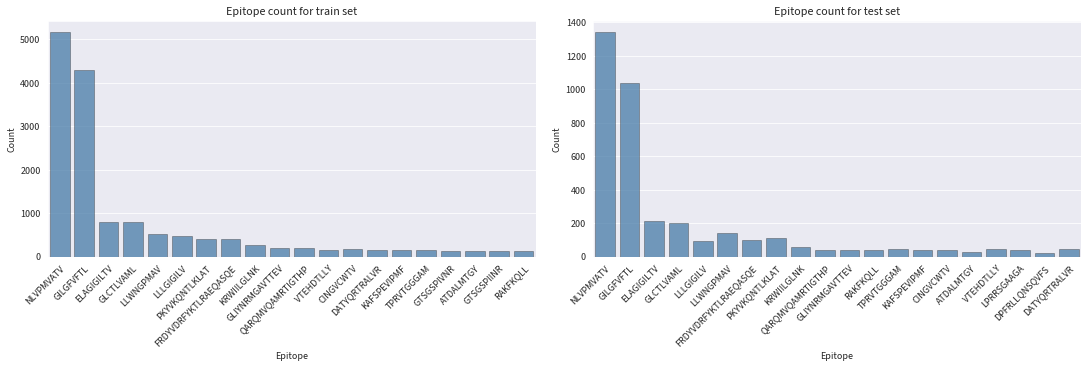

---------------------------------
Iteration 3

Size of train set: 17759
Size of test set: 4439
Train to test ratio: 0.8 : 0.2 
Unique epitopes in train set: 160
Unique epitopes in test set: 122


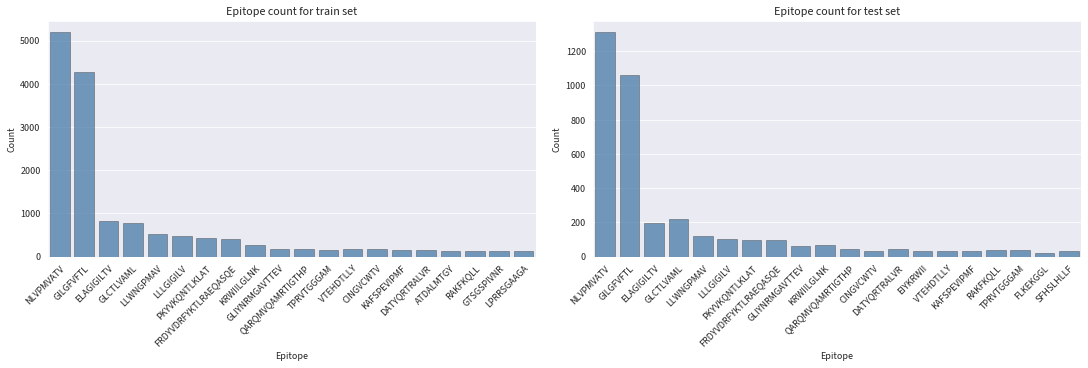

---------------------------------
Iteration 4

Size of train set: 17759
Size of test set: 4439
Train to test ratio: 0.8 : 0.2 
Unique epitopes in train set: 159
Unique epitopes in test set: 128


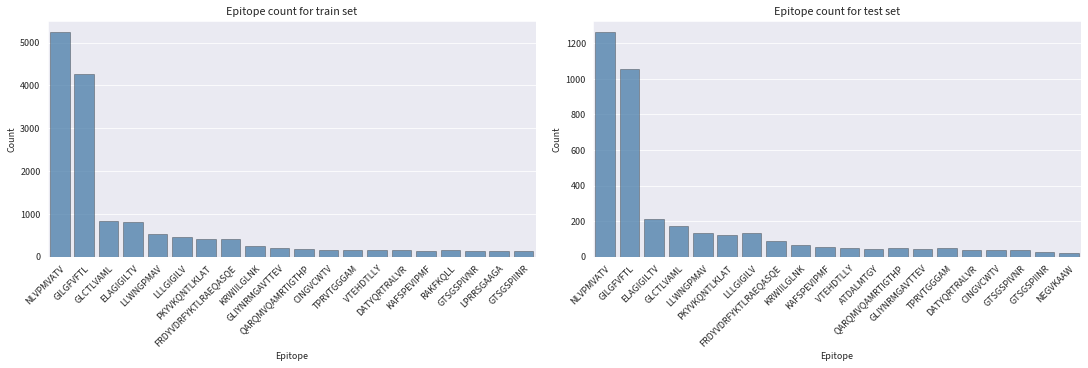

---------------------------------


In [6]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
print(f"Using a K-Fold (k = {5}) cross-validation strategy with the following settings:\n{kf}")

for iteration, (train_index, test_index) in enumerate(kf.split(df.index)):
    fold_analysis(iteration, train_index, test_index, df)

# Group K-Fold

Using a Group K-Fold (k = 5) cross-validation strategy with the following settings:
GroupKFold(n_splits=5)
Iteration 0

Size of train set: 15688
Size of test set: 6510
Train to test ratio: 0.71 : 0.29 
Unique epitopes in train set: 95
Unique epitopes in test set: 101


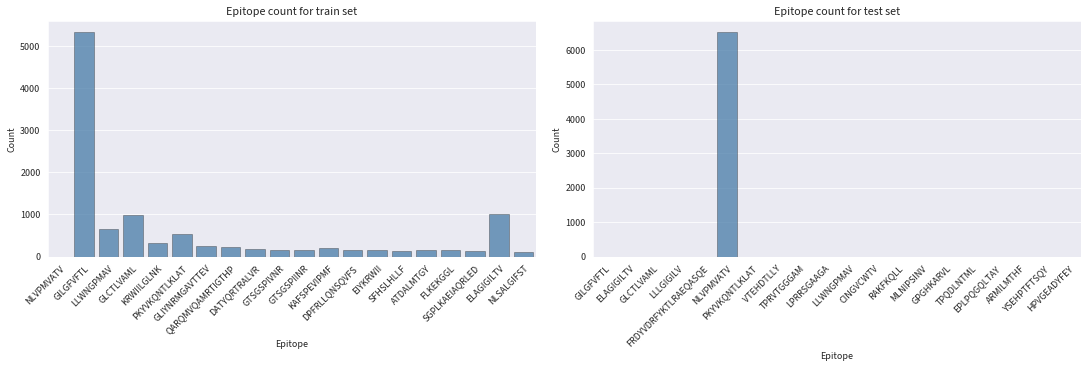

---------------------------------
Iteration 1

Size of train set: 16865
Size of test set: 5333
Train to test ratio: 0.76 : 0.24 
Unique epitopes in train set: 163
Unique epitopes in test set: 2


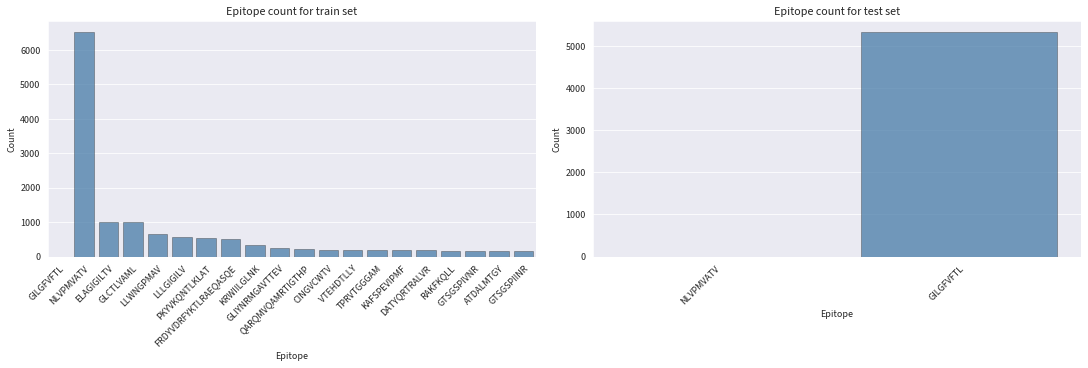

---------------------------------
Iteration 2

Size of train set: 18746
Size of test set: 3452
Train to test ratio: 0.84 : 0.16 
Unique epitopes in train set: 150
Unique epitopes in test set: 53


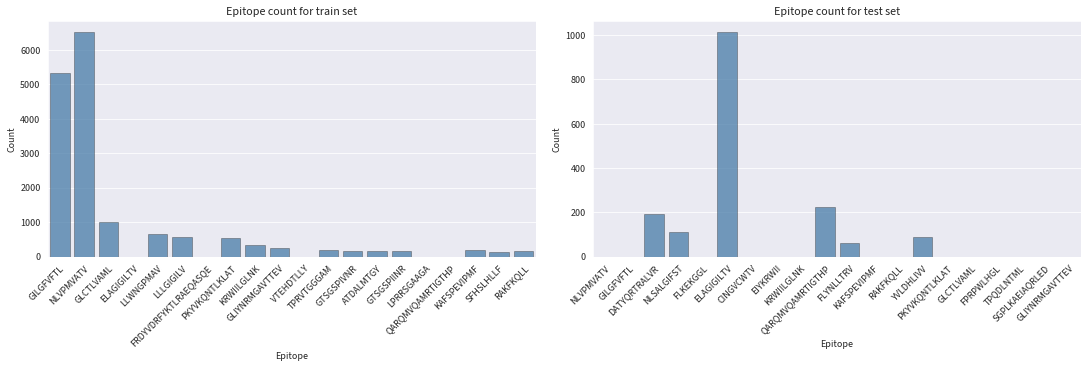

---------------------------------
Iteration 3

Size of train set: 18746
Size of test set: 3452
Train to test ratio: 0.84 : 0.16 
Unique epitopes in train set: 160
Unique epitopes in test set: 40


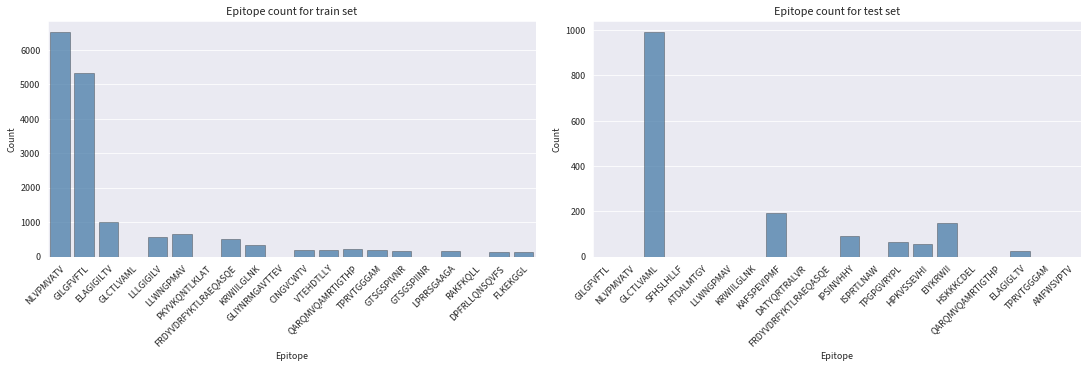

---------------------------------
Iteration 4

Size of train set: 18747
Size of test set: 3451
Train to test ratio: 0.84 : 0.16 
Unique epitopes in train set: 137
Unique epitopes in test set: 65


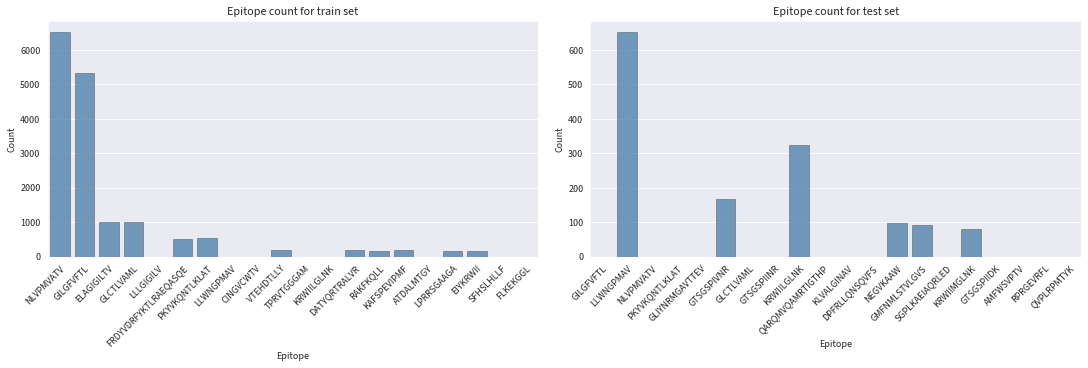

---------------------------------


In [7]:
k = 5
group_kf_5 = GroupKFold(n_splits=k)
print(f"Using a Group K-Fold (k = {k}) cross-validation strategy with the following settings:\n{group_kf_5}")

fold_indices_group_5 = [(train_index, test_index) for train_index, test_index in group_kf_5.split(df.index, groups=df["antigen.epitope"])]

for iteration, (train_index, test_index) in enumerate(fold_indices_group_5):
    fold_analysis(iteration, train_index, test_index, df)   

Using a Group K-Fold (k = 10) cross-validation strategy with the following settings:
GroupKFold(n_splits=10)
Iteration 0

Size of train set: 15688
Size of test set: 6510
Train to test ratio: 0.71 : 0.29 
Unique epitopes in train set: 95
Unique epitopes in test set: 101


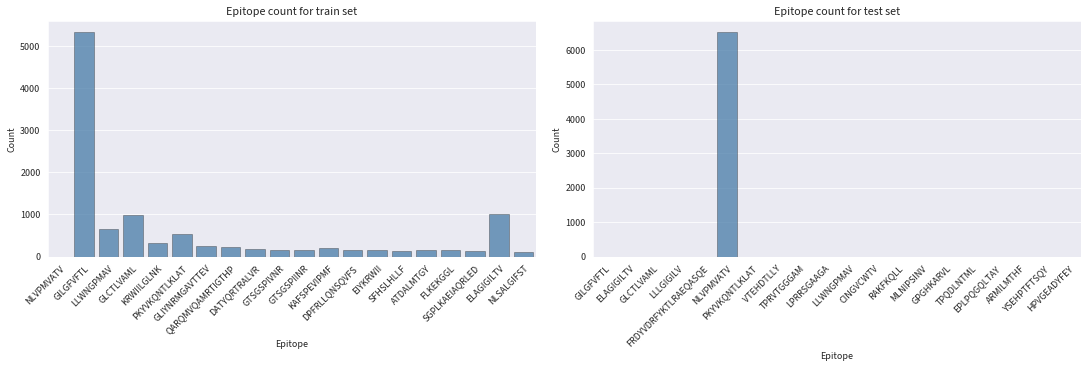

---------------------------------
Iteration 1

Size of train set: 16865
Size of test set: 5333
Train to test ratio: 0.76 : 0.24 
Unique epitopes in train set: 163
Unique epitopes in test set: 2


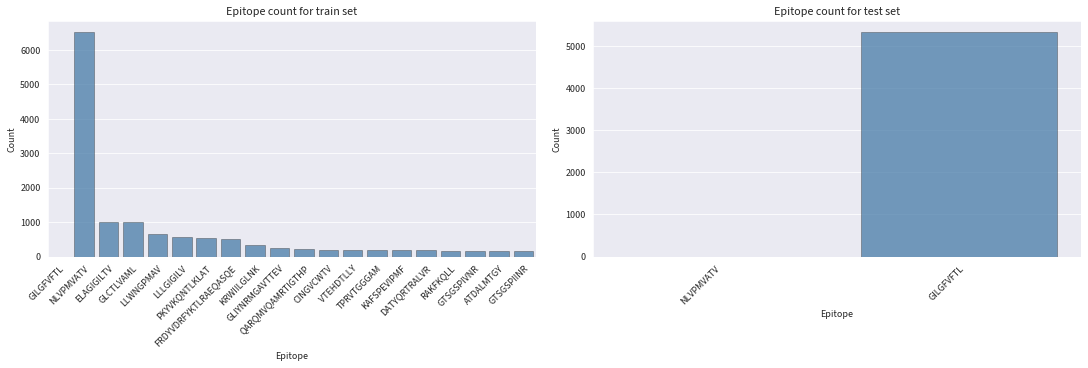

---------------------------------
Iteration 2

Size of train set: 20903
Size of test set: 1295
Train to test ratio: 0.94 : 0.06 
Unique epitopes in train set: 163
Unique epitopes in test set: 26


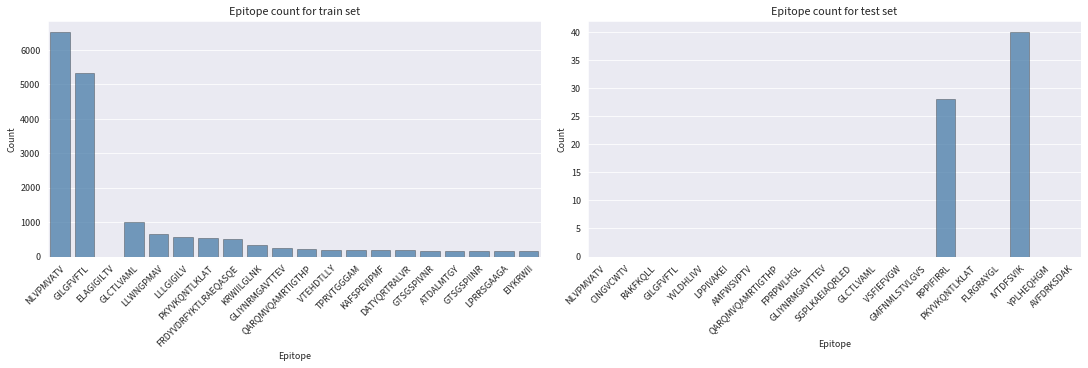

---------------------------------
Iteration 3

Size of train set: 20903
Size of test set: 1295
Train to test ratio: 0.94 : 0.06 
Unique epitopes in train set: 160
Unique epitopes in test set: 16


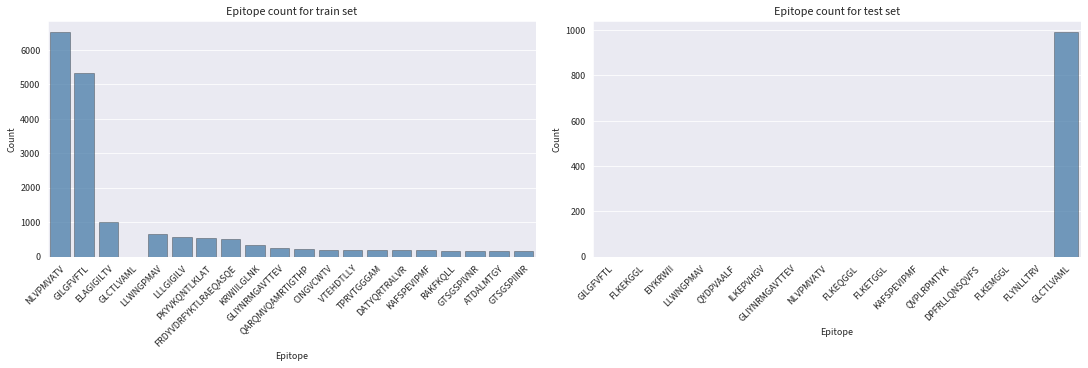

---------------------------------
Iteration 4

Size of train set: 20903
Size of test set: 1295
Train to test ratio: 0.94 : 0.06 
Unique epitopes in train set: 162
Unique epitopes in test set: 20


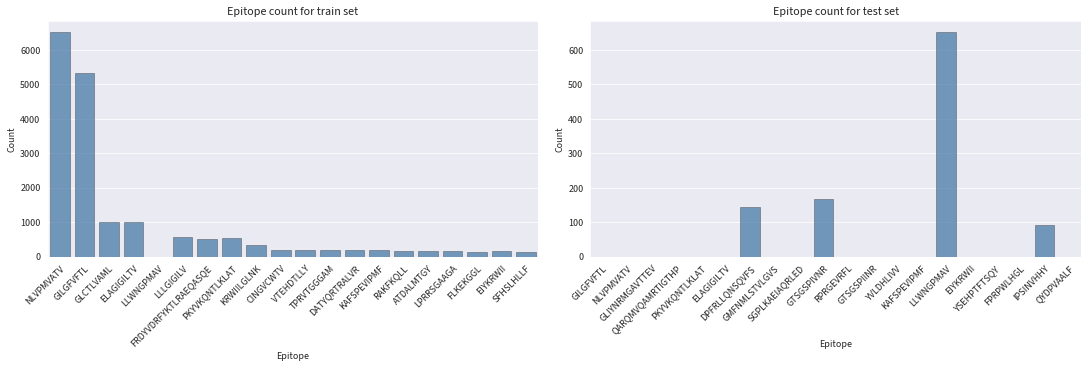

---------------------------------
Iteration 5

Size of train set: 20904
Size of test set: 1294
Train to test ratio: 0.94 : 0.06 
Unique epitopes in train set: 149
Unique epitopes in test set: 33


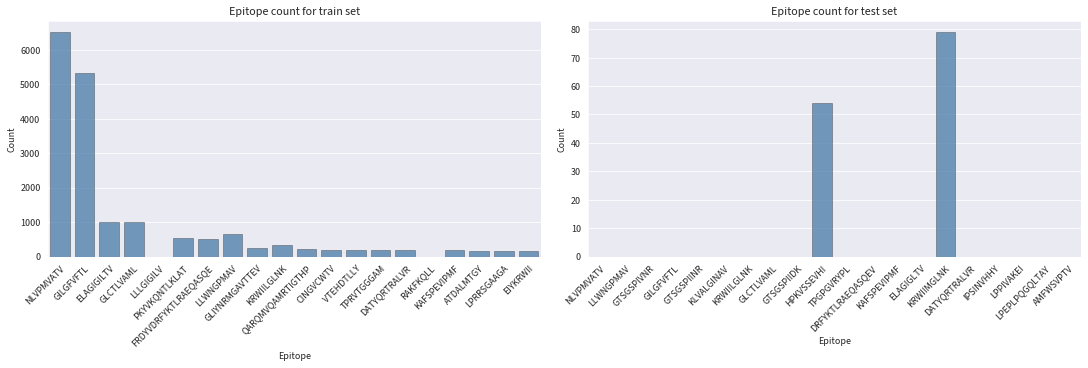

---------------------------------
Iteration 6

Size of train set: 20904
Size of test set: 1294
Train to test ratio: 0.94 : 0.06 
Unique epitopes in train set: 162
Unique epitopes in test set: 31


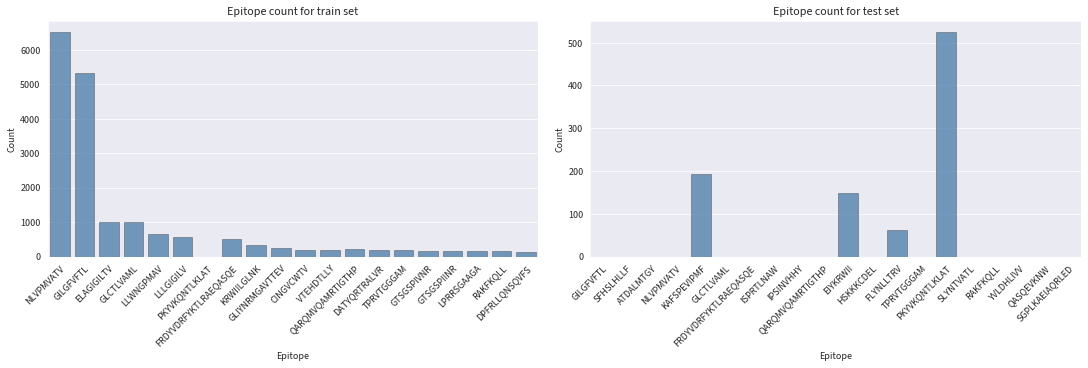

---------------------------------
Iteration 7

Size of train set: 20904
Size of test set: 1294
Train to test ratio: 0.94 : 0.06 
Unique epitopes in train set: 160
Unique epitopes in test set: 24


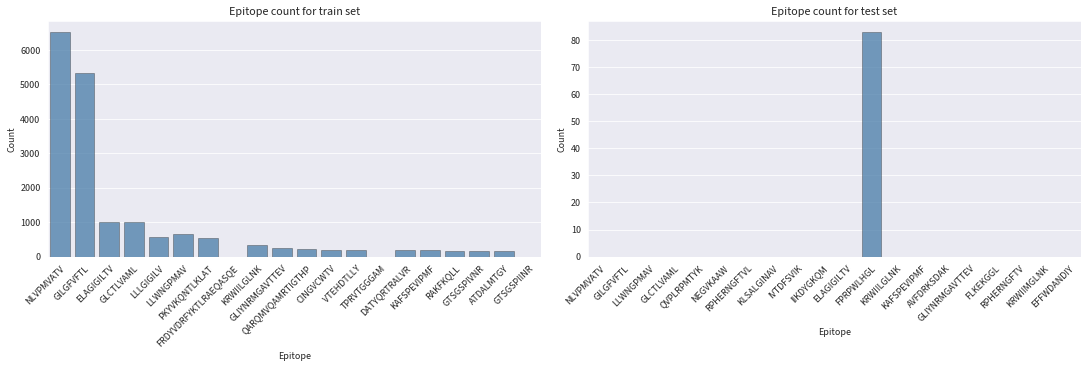

---------------------------------
Iteration 8

Size of train set: 20904
Size of test set: 1294
Train to test ratio: 0.94 : 0.06 
Unique epitopes in train set: 152
Unique epitopes in test set: 36


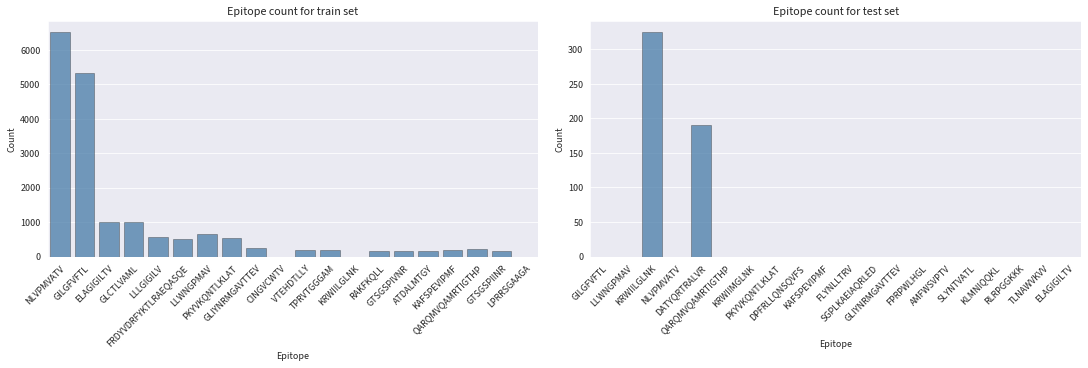

---------------------------------
Iteration 9

Size of train set: 20904
Size of test set: 1294
Train to test ratio: 0.94 : 0.06 
Unique epitopes in train set: 155
Unique epitopes in test set: 36


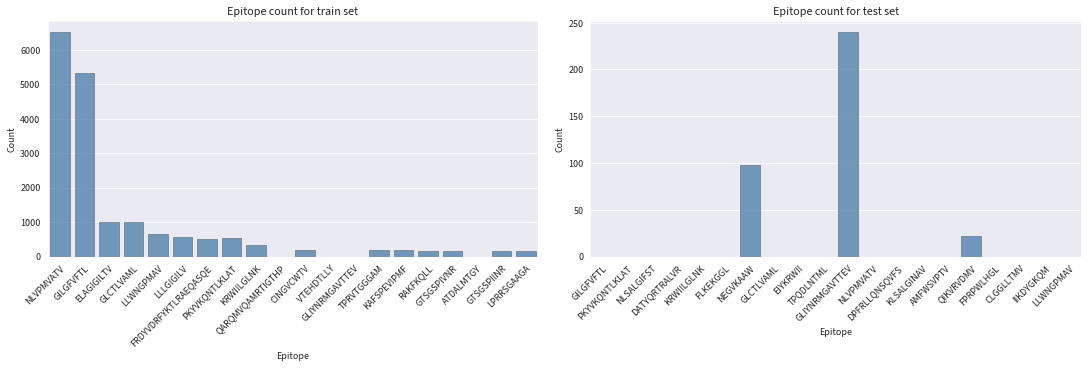

---------------------------------


In [8]:
k = 10
group_kf_10 = GroupKFold(n_splits=k)
print(f"Using a Group K-Fold (k = {k}) cross-validation strategy with the following settings:\n{group_kf_10}")

fold_indices_group_10 = [(train_index, test_index) for train_index, test_index in group_kf_10.split(df.index, groups=df["antigen.epitope"])]

for iteration, (train_index, test_index) in enumerate(fold_indices_group_10):
    fold_analysis(iteration, train_index, test_index, df)   

## 5 vs 10 folds

In [9]:
fold_indices_group_5 = [(train_index, test_index) for train_index, test_index in group_kf_5.split(df.index, groups=df["antigen.epitope"])]
for iteration, (train_index, test_index) in enumerate(fold_indices_group_5):
    fold_analysis(iteration, train_index, test_index, df, plot=False)

Iteration 0

Size of train set: 15688
Size of test set: 6510
Train to test ratio: 0.71 : 0.29 
Unique epitopes in train set: 95
Unique epitopes in test set: 101
---------------------------------
Iteration 1

Size of train set: 16865
Size of test set: 5333
Train to test ratio: 0.76 : 0.24 
Unique epitopes in train set: 163
Unique epitopes in test set: 2
---------------------------------
Iteration 2

Size of train set: 18746
Size of test set: 3452
Train to test ratio: 0.84 : 0.16 
Unique epitopes in train set: 150
Unique epitopes in test set: 53
---------------------------------
Iteration 3

Size of train set: 18746
Size of test set: 3452
Train to test ratio: 0.84 : 0.16 
Unique epitopes in train set: 160
Unique epitopes in test set: 40
---------------------------------
Iteration 4

Size of train set: 18747
Size of test set: 3451
Train to test ratio: 0.84 : 0.16 
Unique epitopes in train set: 137
Unique epitopes in test set: 65
---------------------------------


In [10]:
fold_indices_group_10 = [(train_index, test_index) for train_index, test_index in group_kf_10.split(df.index, groups=df["antigen.epitope"])]
for iteration, (train_index, test_index) in enumerate(fold_indices_group_10):
    fold_analysis(iteration, train_index, test_index, df, plot=False)

Iteration 0

Size of train set: 15688
Size of test set: 6510
Train to test ratio: 0.71 : 0.29 
Unique epitopes in train set: 95
Unique epitopes in test set: 101
---------------------------------
Iteration 1

Size of train set: 16865
Size of test set: 5333
Train to test ratio: 0.76 : 0.24 
Unique epitopes in train set: 163
Unique epitopes in test set: 2
---------------------------------
Iteration 2

Size of train set: 20903
Size of test set: 1295
Train to test ratio: 0.94 : 0.06 
Unique epitopes in train set: 163
Unique epitopes in test set: 26
---------------------------------
Iteration 3

Size of train set: 20903
Size of test set: 1295
Train to test ratio: 0.94 : 0.06 
Unique epitopes in train set: 160
Unique epitopes in test set: 16
---------------------------------
Iteration 4

Size of train set: 20903
Size of test set: 1295
Train to test ratio: 0.94 : 0.06 
Unique epitopes in train set: 162
Unique epitopes in test set: 20
---------------------------------
Iteration 5

Size of train

As the number of folds go up, the size of the test size seems to go down.

> The folds are approximately balanced in the sense that the number of distinct groups is approximately the same in each fold.

In both cases, there are always two folds with just a single epitope in the test set, namely the most abundant epitopes. The others contain a mix of low abundance epitopes.

The cause is that every group needs to be in the test set exactly once. In other words, whichever fold that ends up holding `NLVPMVATV` or `GILGFVFTL` will have at least 5333 samples (or about 24% of the data). Thus, these two folds are too big, forcing the others to be too small.

For `k=10`, ideally folds should contain about 10% of the data, this means that the other folds will shrink by about `15%*2/8 ~ 4%`.

In [11]:
5333/21951

0.2429502072798506

## Down-sample major epitope groups

In [12]:
train_index = fold_indices_group_5[0][0]

In [13]:
df["antigen.epitope"].value_counts()

NLVPMVATV     6510
GILGFVFTL     5333
ELAGIGILTV    1014
GLCTLVAML      992
LLWNGPMAV      652
              ... 
LLFGPVYV         1
LGYGFVNYI        1
ELAGIGALTV       1
ELAAIGILTV       1
LLFGYAVYV        1
Name: antigen.epitope, Length: 163, dtype: int64

In [14]:
df.shape

(22198, 4)

In [15]:
df.drop(df[df["antigen.epitope"] == "NLVPMVATV"].sample(frac=.5).index).shape

(18943, 4)

In [16]:
22198 - 6510/2

18943.0

In [17]:
df_sub = df.drop(df[df["antigen.epitope"] == "NLVPMVATV"].sample(frac=.83).index)
df_sub = df_sub.drop(df_sub[df_sub["antigen.epitope"] == "GILGFVFTL"].sample(frac=.80).index)

Check what happens if the index is not reset.

In [18]:
df_sub["antigen.epitope"].value_counts()

NLVPMVATV     1107
GILGFVFTL     1067
ELAGIGILTV    1014
GLCTLVAML      992
LLWNGPMAV      652
              ... 
ELAAIGILTV       1
ELAGIGALTV       1
LLFGPVYV         1
LLFGYAVYV        1
LLFGYPVAV        1
Name: antigen.epitope, Length: 163, dtype: int64

NOTE: don't forget to reset the index, otherwise loc and iloc will behave differently.

In [19]:
df_sub.loc[train_index, "antigen.epitope"]

/home/pieter/miniconda3/envs/deepTCR/lib/python3.6/site-packages/pandas/core/indexing.py:961: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]


0         FLKEKGGL
1         FLKEKGGL
2         FLKEKGGL
3         FLKEKGGL
4         FLKEKGGL
           ...    
22193    ELKRKMIYM
22194    ELKRKMIYM
22195    CVETMCNEY
22196    CVETMCNEY
22197    DEEDAIAAY
Name: antigen.epitope, Length: 15688, dtype: object

In [21]:
df_sub.iloc[train_index,"antigen.epitope"].value_counts()

IndexError: positional indexers are out-of-bounds

In [23]:
df_sub.loc[train_index, "antigen.epitope"].value_counts()

NLVPMVATV          1054
GILGFVFTL           762
LLWNGPMAV           508
GLCTLVAML           345
KRWIILGLNK          316
                   ... 
LPEPLPQGQLGAY         2
LNKIVRMYSPTSILD       2
GPEPLPQGQLTAY         2
DEEDAIAAY             1
PKYVKQNTLKLAR         1
Name: antigen.epitope, Length: 95, dtype: int64

In [24]:
df_sub.reset_index().iloc[train_index]["antigen.epitope"].value_counts()

IndexError: positional indexers are out-of-bounds

In [25]:
df_sub.reset_index().loc[train_index, "antigen.epitope"].value_counts()

NLVPMVATV     1107
GILGFVFTL     1067
ELAGIGILTV    1014
GLCTLVAML      992
LLWNGPMAV      652
              ... 
ELAAIGILTV       1
ELAGIGALTV       1
LLFGPVYV         1
LLFGYAVYV        1
LLFGYPVAV        1
Name: antigen.epitope, Length: 163, dtype: int64

In [26]:
df_sub = df_sub.reset_index(drop=True)

### 5 vs 10

In [27]:
fold_indices_group_5 = [(train_index, test_index) for train_index, test_index in group_kf_5.split(df_sub.index, groups=df_sub["antigen.epitope"])]
for iteration, (train_index, test_index) in enumerate(fold_indices_group_5):
    fold_analysis(iteration, train_index, test_index, df_sub, plot=False)

Iteration 0

Size of train set: 10023
Size of test set: 2506
Train to test ratio: 0.8 : 0.2 
Unique epitopes in train set: 130
Unique epitopes in test set: 33
---------------------------------
Iteration 1

Size of train set: 10023
Size of test set: 2506
Train to test ratio: 0.8 : 0.2 
Unique epitopes in train set: 130
Unique epitopes in test set: 33
---------------------------------
Iteration 2

Size of train set: 10023
Size of test set: 2506
Train to test ratio: 0.8 : 0.2 
Unique epitopes in train set: 131
Unique epitopes in test set: 32
---------------------------------
Iteration 3

Size of train set: 10023
Size of test set: 2506
Train to test ratio: 0.8 : 0.2 
Unique epitopes in train set: 131
Unique epitopes in test set: 32
---------------------------------
Iteration 4

Size of train set: 10024
Size of test set: 2505
Train to test ratio: 0.8 : 0.2 
Unique epitopes in train set: 130
Unique epitopes in test set: 33
---------------------------------


In [28]:
fold_indices_group_10 = [(train_index, test_index) for train_index, test_index in group_kf_10.split(df_sub.index, groups=df_sub["antigen.epitope"])]
for iteration, (train_index, test_index) in enumerate(fold_indices_group_10):
    fold_analysis(iteration, train_index, test_index, df_sub, plot=False)

Iteration 0

Size of train set: 11276
Size of test set: 1253
Train to test ratio: 0.9 : 0.1 
Unique epitopes in train set: 151
Unique epitopes in test set: 12
---------------------------------
Iteration 1

Size of train set: 11276
Size of test set: 1253
Train to test ratio: 0.9 : 0.1 
Unique epitopes in train set: 150
Unique epitopes in test set: 13
---------------------------------
Iteration 2

Size of train set: 11276
Size of test set: 1253
Train to test ratio: 0.9 : 0.1 
Unique epitopes in train set: 148
Unique epitopes in test set: 15
---------------------------------
Iteration 3

Size of train set: 11276
Size of test set: 1253
Train to test ratio: 0.9 : 0.1 
Unique epitopes in train set: 148
Unique epitopes in test set: 15
---------------------------------
Iteration 4

Size of train set: 11276
Size of test set: 1253
Train to test ratio: 0.9 : 0.1 
Unique epitopes in train set: 146
Unique epitopes in test set: 17
---------------------------------
Iteration 5

Size of train set: 112

The difference between train and test ratios is much less pronounced after down sampling, since it approximates the expected .1 or .2 ratio for 10 or 5 folds respectively for all folds, with no outliers.

# Leave One Group Out

In [29]:
leave_one_out = LeaveOneGroupOut()
print(f"Using a Leave One Group Out cross-validation strategy with the following settings:\n{leave_one_out}")

leave_one_out_indices = [(train_index, test_index) for train_index, test_index in leave_one_out.split(df.index, groups=df["antigen.epitope"])]

len(leave_one_out_indices)

test_size_list = []
for iteration, (train_index, test_index) in enumerate(leave_one_out_indices):
    test_size_list.append(len(test_index))
test_size_list.sort()
print(test_size_list)

Using a Leave One Group Out cross-validation strategy with the following settings:
LeaveOneGroupOut()
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 6, 6, 6, 6, 6, 6, 7, 8, 8, 8, 8, 8, 9, 9, 10, 10, 10, 10, 11, 12, 12, 13, 15, 15, 16, 16, 18, 19, 20, 22, 22, 22, 24, 24, 25, 25, 26, 27, 28, 28, 29, 30, 30, 31, 31, 32, 36, 40, 41, 45, 46, 50, 51, 53, 53, 53, 54, 54, 56, 60, 61, 66, 66, 73, 79, 82, 83, 88, 91, 92, 98, 101, 110, 111, 126, 132, 145, 145, 148, 159, 160, 165, 167, 172, 190, 193, 197, 199, 201, 226, 240, 325, 508, 525, 577, 652, 992, 1014, 5333, 6510]


Leave One Group Out results in a large amount of tiny test folds.

However, it does automatically result in a performance estimation for each epitope group.

The only issue is that since some epitopes might be similar, and the train set consists of all epitopes except for the test one, the performance estimate might be too optimistic.

# Group Shuffle Split

In [30]:
df["antigen.epitope"].value_counts()

NLVPMVATV     6510
GILGFVFTL     5333
ELAGIGILTV    1014
GLCTLVAML      992
LLWNGPMAV      652
              ... 
LLFGPVYV         1
LGYGFVNYI        1
ELAGIGALTV       1
ELAAIGILTV       1
LLFGYAVYV        1
Name: antigen.epitope, Length: 163, dtype: int64

Using a Group Shuffle Split (k = 5) cross-validation strategy with the following settings:
GroupShuffleSplit(n_splits=5, random_state=None, test_size=None,
         train_size=None)
Iteration 0

Size of train set: 18697
Size of test set: 3501
Train to test ratio: 0.84 : 0.16 
Unique epitopes in train set: 158
Unique epitopes in test set: 40


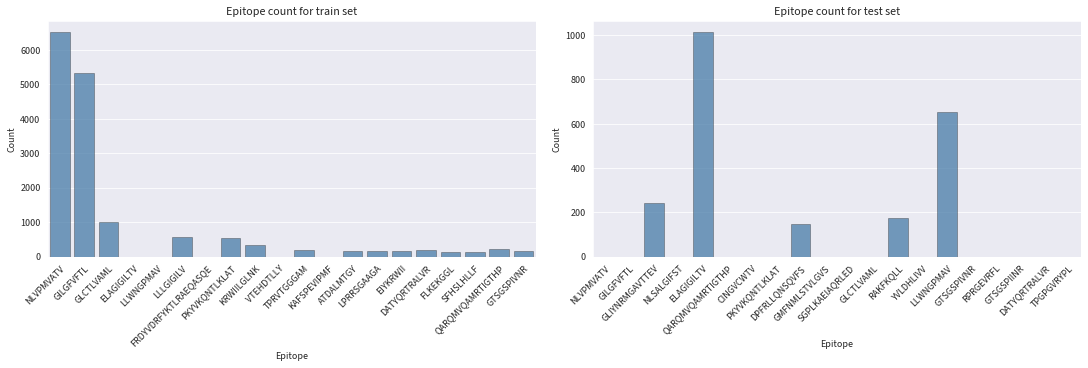

---------------------------------
Iteration 1

Size of train set: 21076
Size of test set: 1122
Train to test ratio: 0.95 : 0.05 
Unique epitopes in train set: 159
Unique epitopes in test set: 26


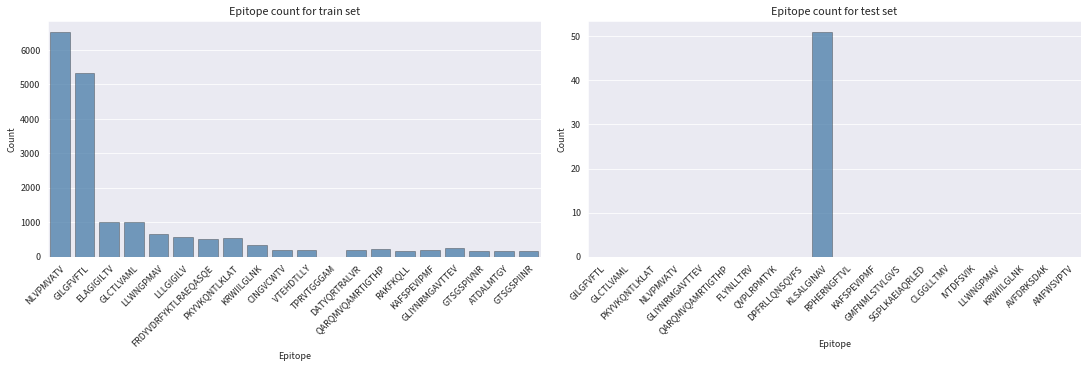

---------------------------------
Iteration 2

Size of train set: 20440
Size of test set: 1758
Train to test ratio: 0.92 : 0.08 
Unique epitopes in train set: 144
Unique epitopes in test set: 47


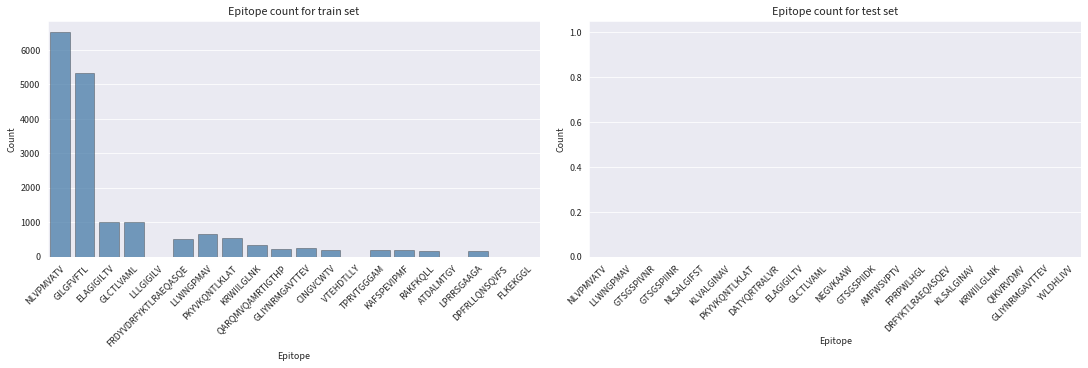

---------------------------------
Iteration 3

Size of train set: 20508
Size of test set: 1690
Train to test ratio: 0.92 : 0.08 
Unique epitopes in train set: 155
Unique epitopes in test set: 39


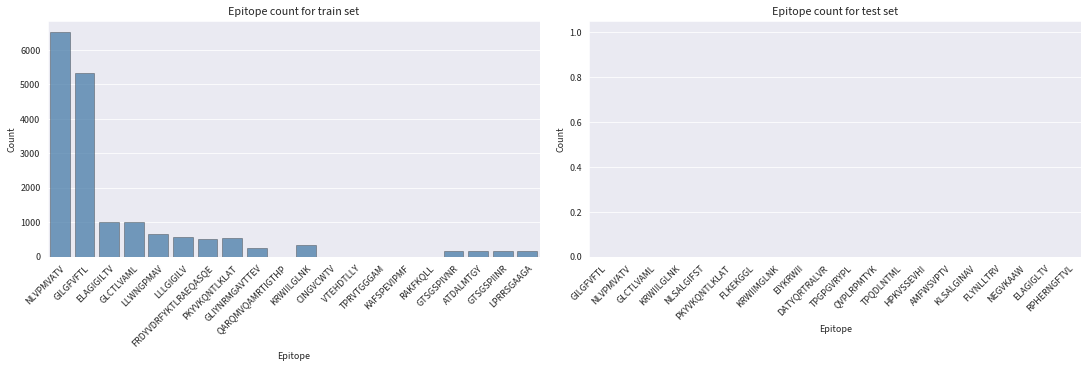

---------------------------------
Iteration 4

Size of train set: 13755
Size of test set: 8443
Train to test ratio: 0.62 : 0.38 
Unique epitopes in train set: 92
Unique epitopes in test set: 114


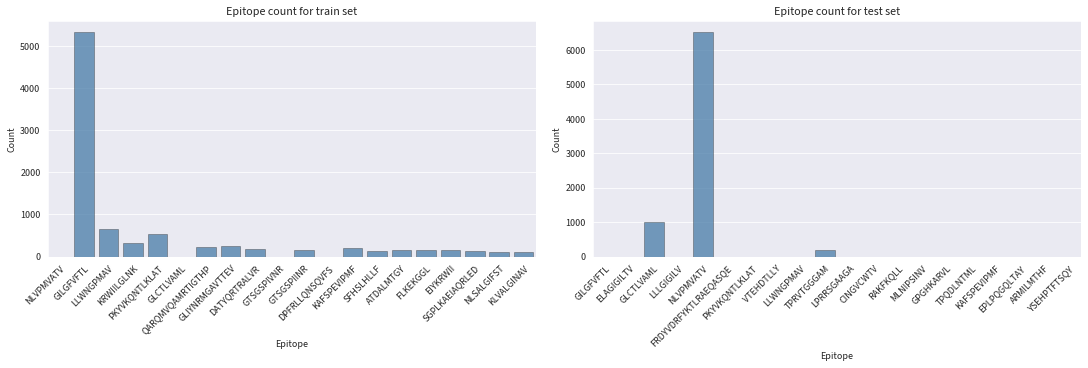

---------------------------------


In [31]:
k = 5
group_shuffle_5 = GroupShuffleSplit(n_splits=k)
print(f"Using a Group Shuffle Split (k = {k}) cross-validation strategy with the following settings:\n{group_shuffle_5}")

fold_indices_shuffle_5 = [(train_index, test_index) for train_index, test_index in group_shuffle_5.split(df.index, groups=df["antigen.epitope"])]

for iteration, (train_index, test_index) in enumerate(fold_indices_shuffle_5):
    fold_analysis(iteration, train_index, test_index, df)   

The issue with shuffle split is that consecutive train-test splits might contain overlaps. Moreover, the train-test ratio is not constant at all.

For example, in 3 out of 5 splits, the train set contained the top 2 most abundant epitopes.

It is likely that the large imbalance in group sizes make this more likely, because if one ends up in one group, the other might be forced to the same one in order to keep the train-test sizes balanced. 

E.g. if all groups have approximately the same size, the chance of two groups being selected for the same test every time is quite low. (although the chance of any two groups being selected multiple times is higher? cf. birthday paradox?)

Using a Group Shuffle Split (k = 10) cross-validation strategy with the following settings:
GroupShuffleSplit(n_splits=10, random_state=None, test_size=None,
         train_size=None)
Iteration 0

Size of train set: 21200
Size of test set: 998
Train to test ratio: 0.96 : 0.04 
Unique epitopes in train set: 158
Unique epitopes in test set: 24


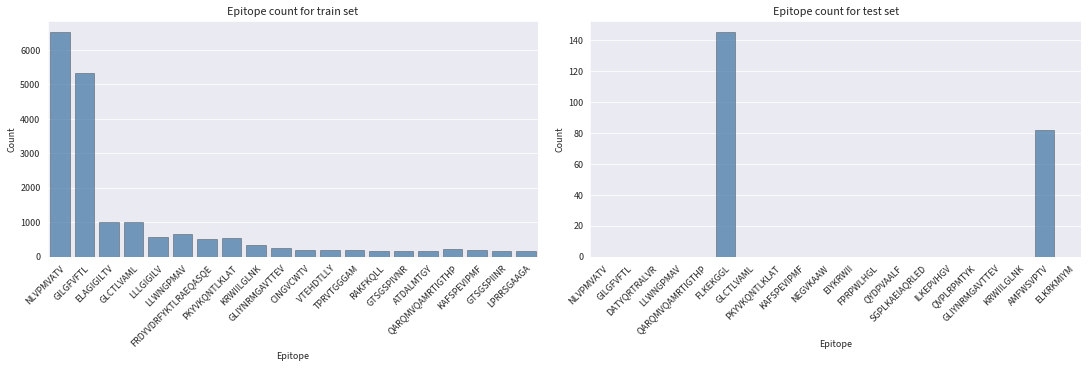

---------------------------------
Iteration 1

Size of train set: 13410
Size of test set: 8788
Train to test ratio: 0.6 : 0.4 
Unique epitopes in train set: 84
Unique epitopes in test set: 126


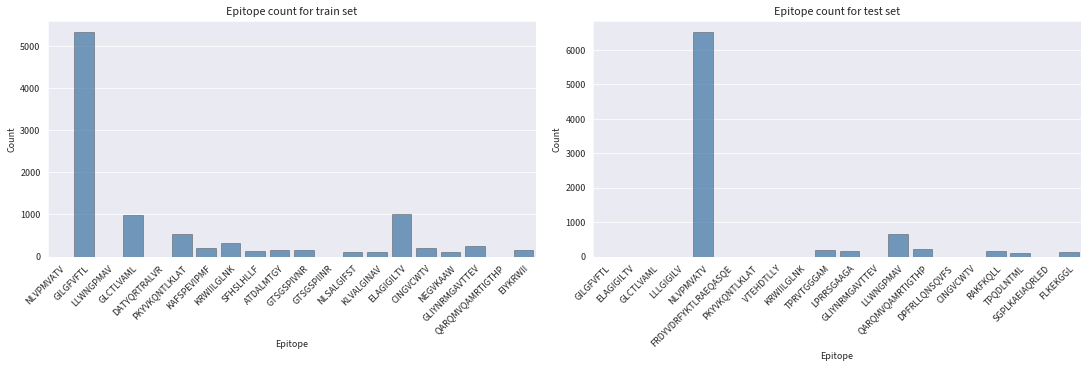

---------------------------------
Iteration 2

Size of train set: 19817
Size of test set: 2381
Train to test ratio: 0.89 : 0.11 
Unique epitopes in train set: 153
Unique epitopes in test set: 41


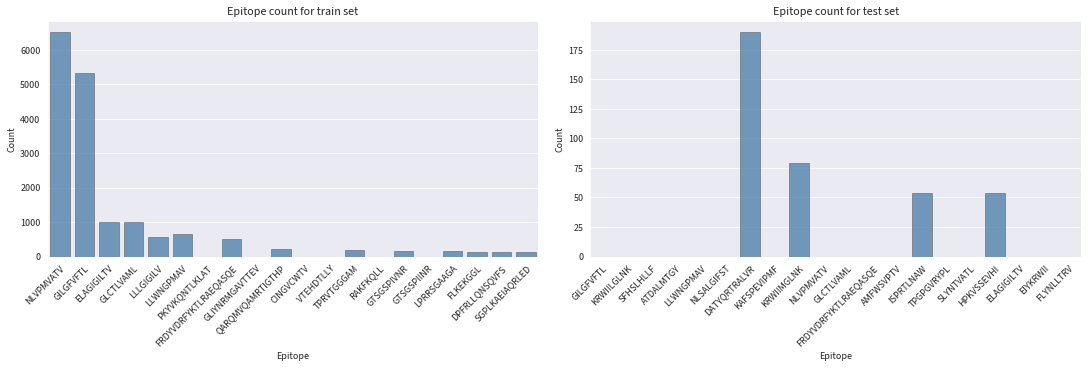

---------------------------------
Iteration 3

Size of train set: 19910
Size of test set: 2288
Train to test ratio: 0.9 : 0.1 
Unique epitopes in train set: 145
Unique epitopes in test set: 54


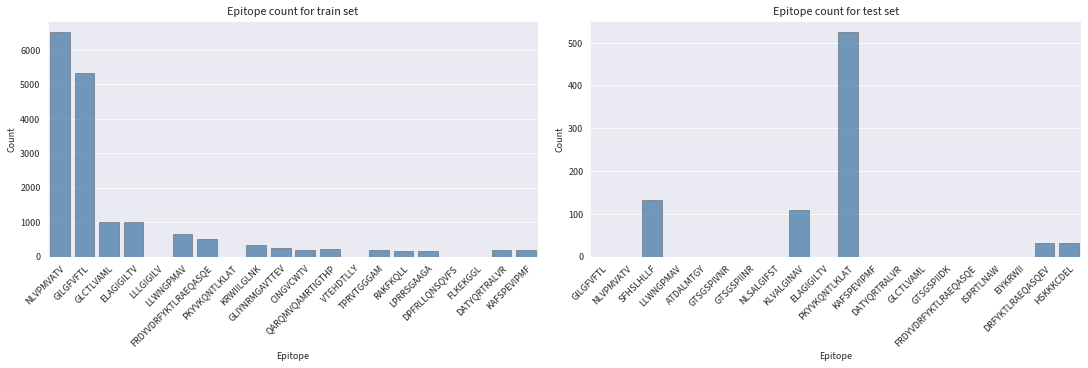

---------------------------------
Iteration 4

Size of train set: 19804
Size of test set: 2394
Train to test ratio: 0.89 : 0.11 
Unique epitopes in train set: 146
Unique epitopes in test set: 56


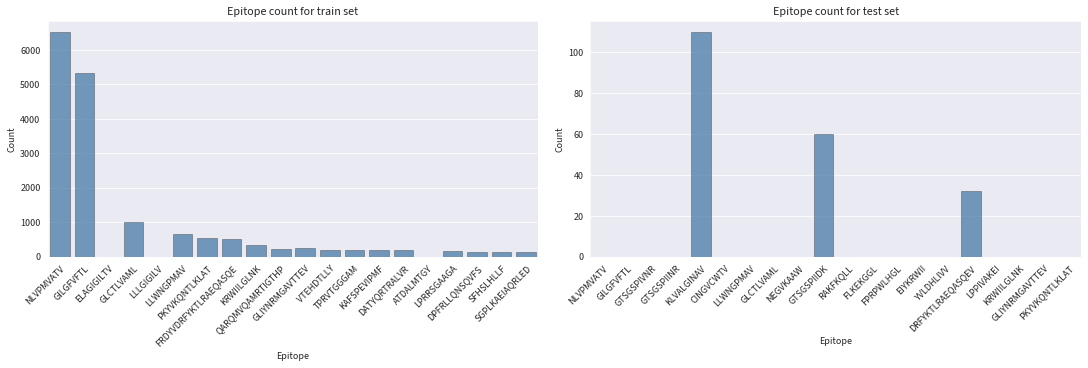

---------------------------------
Iteration 5

Size of train set: 19697
Size of test set: 2501
Train to test ratio: 0.89 : 0.11 
Unique epitopes in train set: 153
Unique epitopes in test set: 44


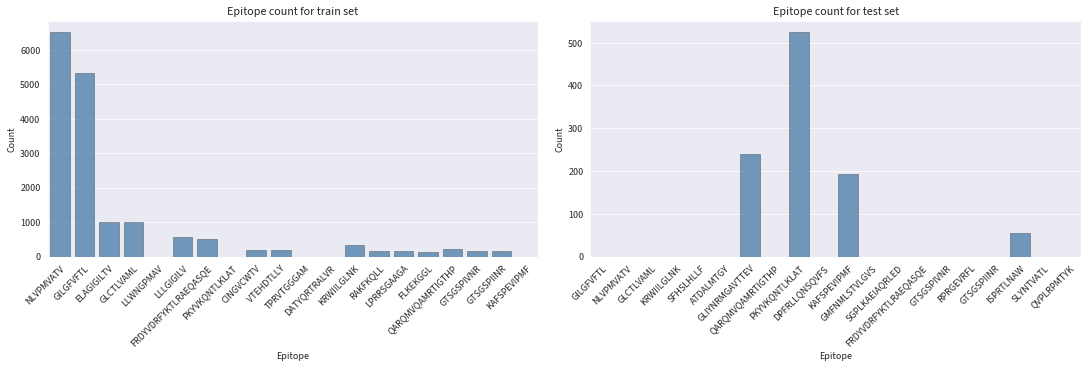

---------------------------------
Iteration 6

Size of train set: 14292
Size of test set: 7906
Train to test ratio: 0.64 : 0.36 
Unique epitopes in train set: 91
Unique epitopes in test set: 114


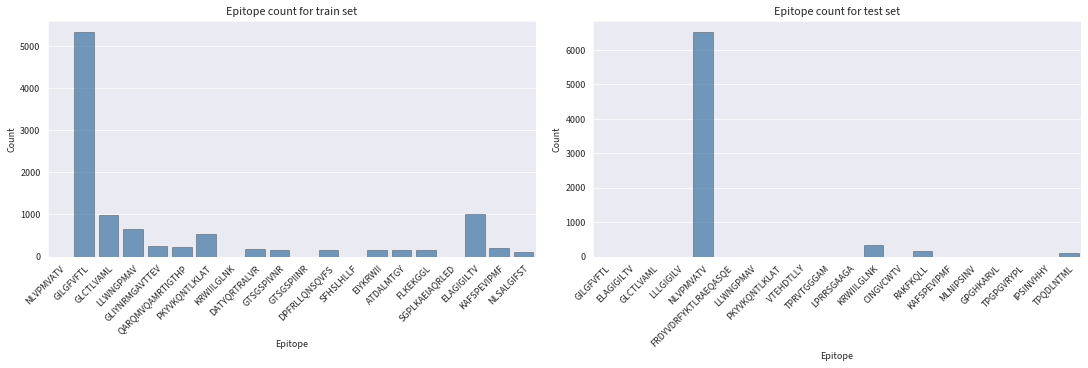

---------------------------------
Iteration 7

Size of train set: 8620
Size of test set: 13578
Train to test ratio: 0.39 : 0.61 
Unique epitopes in train set: 88
Unique epitopes in test set: 112


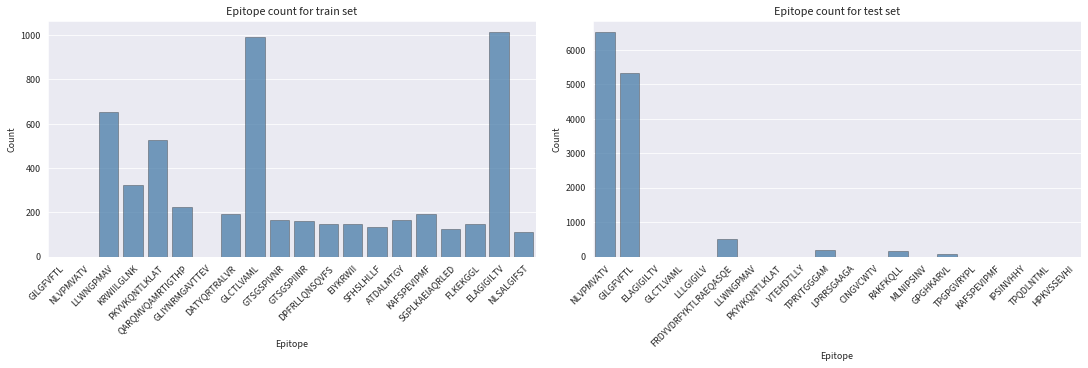

---------------------------------
Iteration 8

Size of train set: 14355
Size of test set: 7843
Train to test ratio: 0.65 : 0.35 
Unique epitopes in train set: 149
Unique epitopes in test set: 35


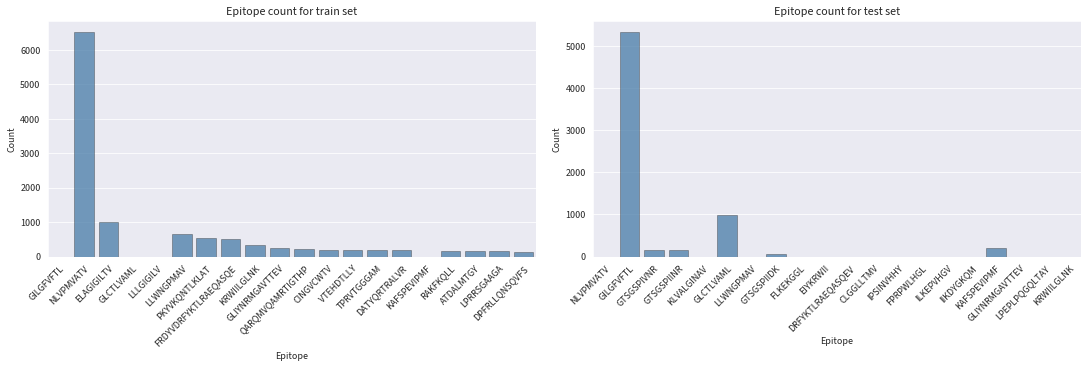

---------------------------------
Iteration 9

Size of train set: 8956
Size of test set: 13242
Train to test ratio: 0.4 : 0.6 
Unique epitopes in train set: 90
Unique epitopes in test set: 109


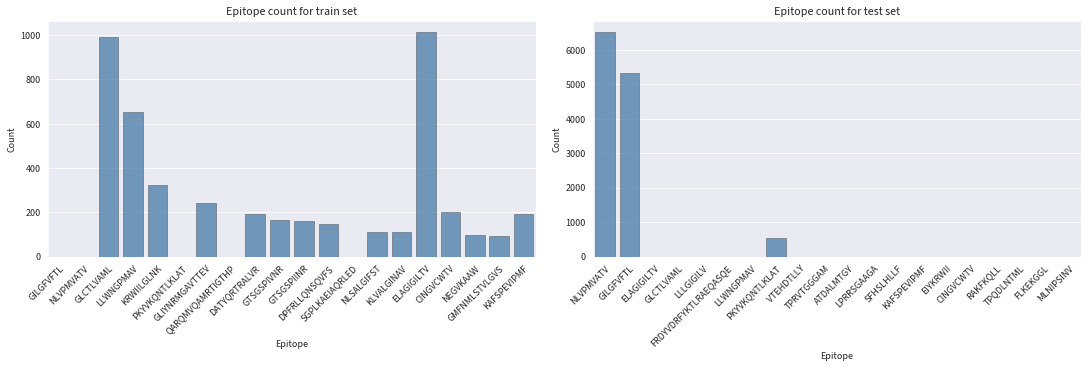

---------------------------------


In [32]:
k = 10
group_shuffle_10 = GroupShuffleSplit(n_splits=k)
print(f"Using a Group Shuffle Split (k = {k}) cross-validation strategy with the following settings:\n{group_shuffle_10}")

fold_indices_shuffle_10 = [(train_index, test_index) for train_index, test_index in group_shuffle_10.split(df.index, groups=df["antigen.epitope"])]

for iteration, (train_index, test_index) in enumerate(fold_indices_shuffle_10):
    fold_analysis(iteration, train_index, test_index, df)   

For a higher number of splits, the ratio between test and train is even more unbalanced. There is even an iteration where the train-test ratio is .3 to .7 (when the top two both ended up in the test set).



## Down-sample

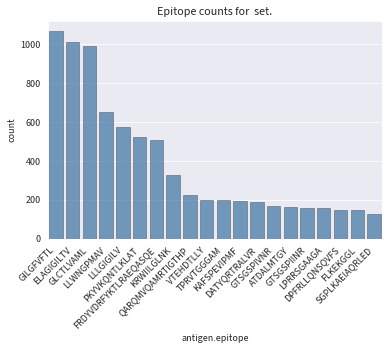

In [33]:
train_index = fold_indices_group_5[0][0]
fig, ax = plt.subplots()
plt.xticks(rotation=45, ha="right")
sns.countplot(ax=ax, x='antigen.epitope', 
                   order=df_sub.loc[train_index, "antigen.epitope"].value_counts().iloc[:20].index, 
                   data=df_sub.iloc[train_index], 
                   edgecolor=".2", linewidth=.5, alpha=.75, color=sns.color_palette("Set1")[1])
ax.set_title(f'Epitope counts for  set.')
plt.show()

Using a Group Shuffle Split (k = 5) cross-validation strategy with the following settings:
GroupShuffleSplit(n_splits=5, random_state=None, test_size=None,
         train_size=None)
Iteration 0

Size of train set: 7497
Size of test set: 5032
Train to test ratio: 0.6 : 0.4 
Unique epitopes in train set: 130
Unique epitopes in test set: 33


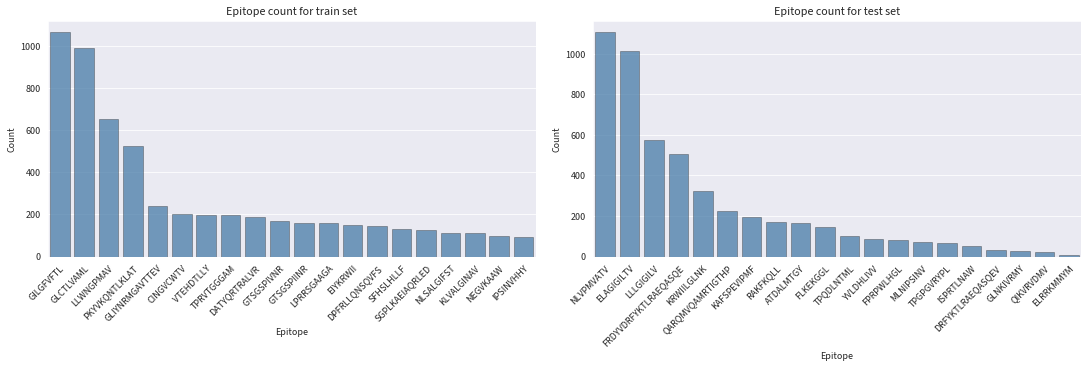

---------------------------------
Iteration 1

Size of train set: 10352
Size of test set: 2177
Train to test ratio: 0.83 : 0.17 
Unique epitopes in train set: 130
Unique epitopes in test set: 33


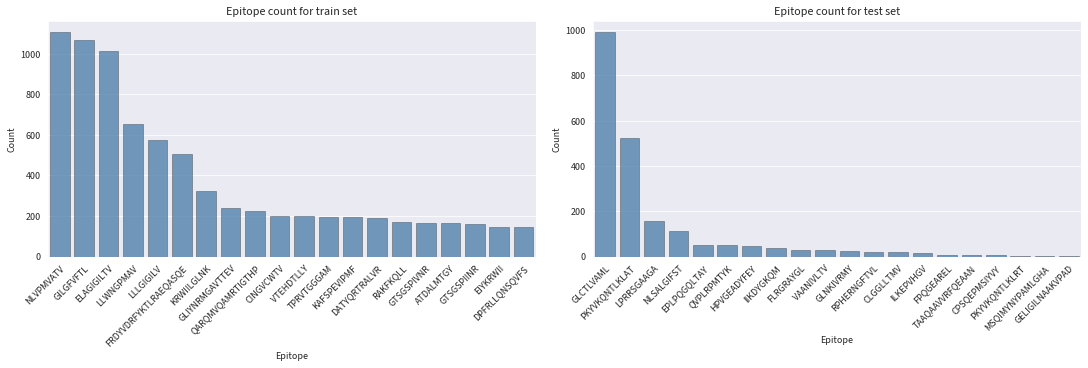

---------------------------------
Iteration 2

Size of train set: 8919
Size of test set: 3610
Train to test ratio: 0.71 : 0.29 
Unique epitopes in train set: 130
Unique epitopes in test set: 33


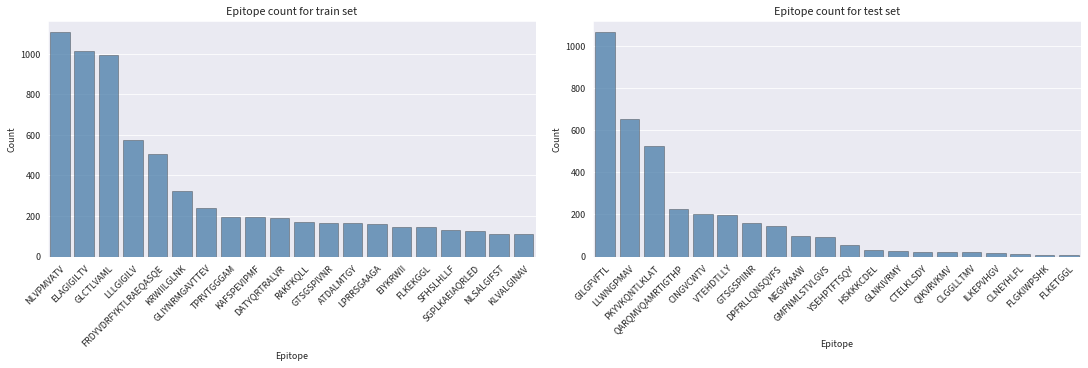

---------------------------------
Iteration 3

Size of train set: 10214
Size of test set: 2315
Train to test ratio: 0.82 : 0.18 
Unique epitopes in train set: 130
Unique epitopes in test set: 33


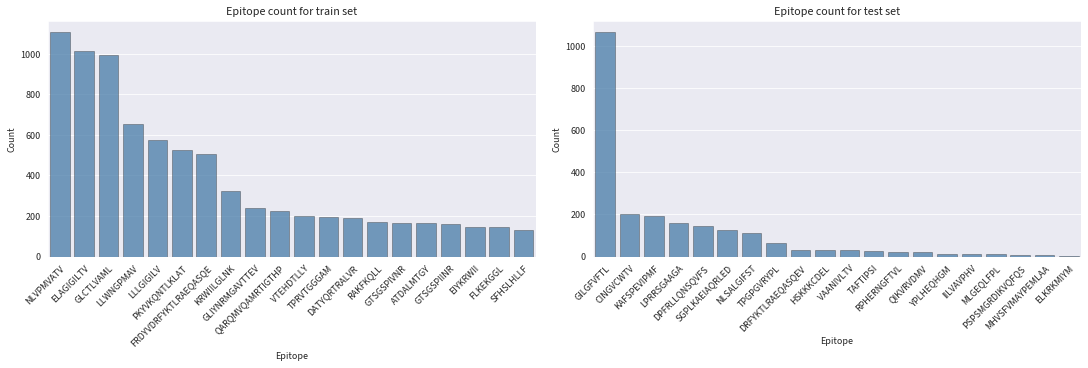

---------------------------------
Iteration 4

Size of train set: 11227
Size of test set: 1302
Train to test ratio: 0.9 : 0.1 
Unique epitopes in train set: 130
Unique epitopes in test set: 33


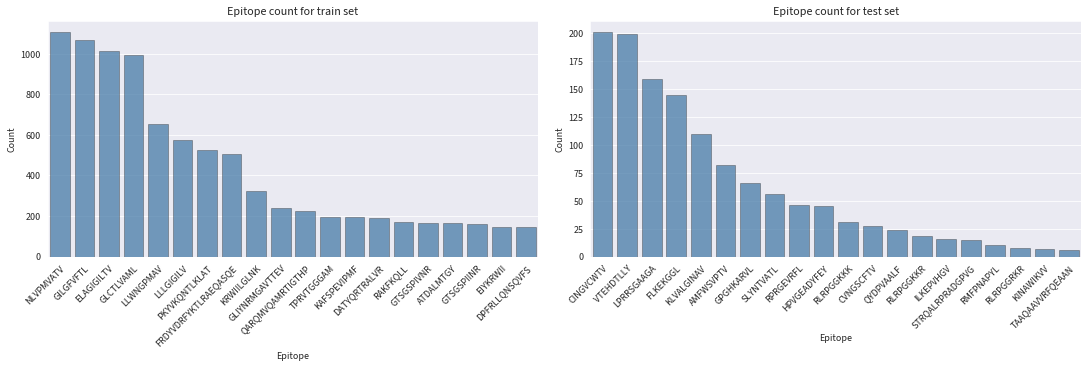

---------------------------------


In [34]:
k = 5
group_shuffle_5_sub = GroupShuffleSplit(n_splits=k)
print(f"Using a Group Shuffle Split (k = {k}) cross-validation strategy with the following settings:\n{group_shuffle_5_sub}")

fold_indices_shuffle_5_sub = [(train_index, test_index) for train_index, test_index in group_shuffle_5.split(df_sub.index, groups=df_sub["antigen.epitope"])]

for iteration, (train_index, test_index) in enumerate(fold_indices_shuffle_5_sub):
    fold_analysis(iteration, train_index, test_index, df_sub, plot=True)   

Down sampling improves the results, but enough splits are required to ensure that certain pairs are not co-occurring too often, or vice versa, to ensure that certain epitopes are split at all.

Using a Group Shuffle Split (k = 10) cross-validation strategy with the following settings:
GroupShuffleSplit(n_splits=10, random_state=None, test_size=None,
         train_size=None)
Iteration 0

Size of train set: 10100
Size of test set: 2429
Train to test ratio: 0.81 : 0.19 
Unique epitopes in train set: 130
Unique epitopes in test set: 33


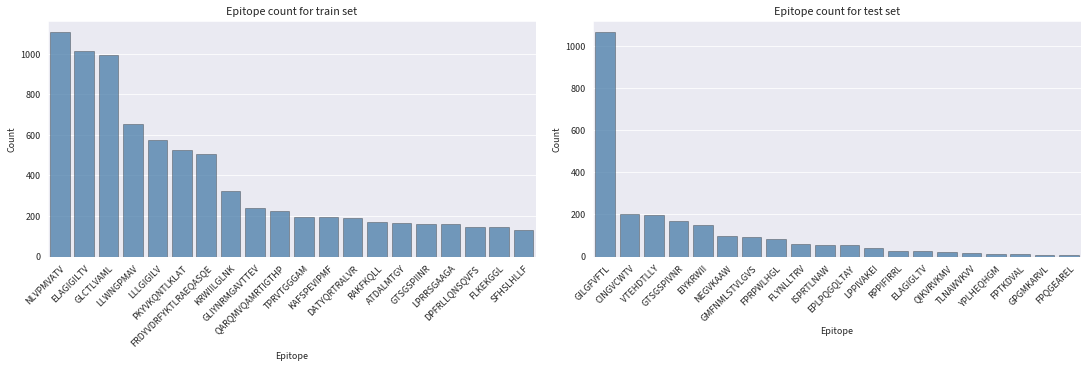

---------------------------------
Iteration 1

Size of train set: 9764
Size of test set: 2765
Train to test ratio: 0.78 : 0.22 
Unique epitopes in train set: 130
Unique epitopes in test set: 33


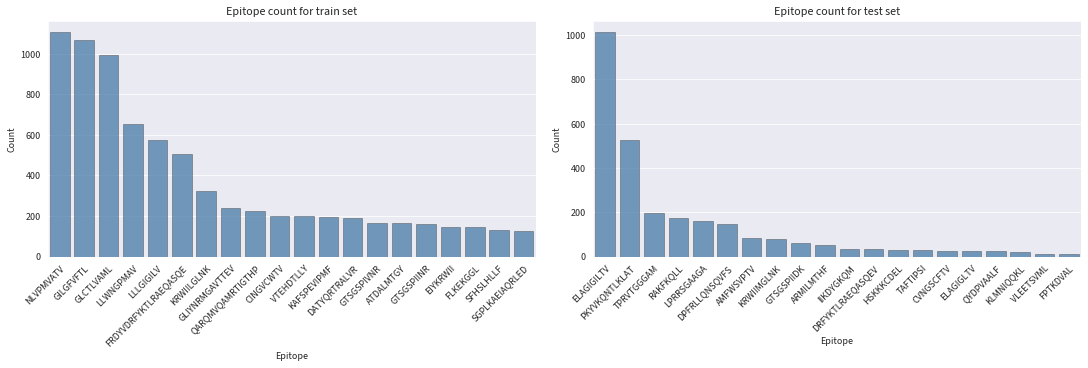

---------------------------------
Iteration 2

Size of train set: 10672
Size of test set: 1857
Train to test ratio: 0.85 : 0.15 
Unique epitopes in train set: 130
Unique epitopes in test set: 33


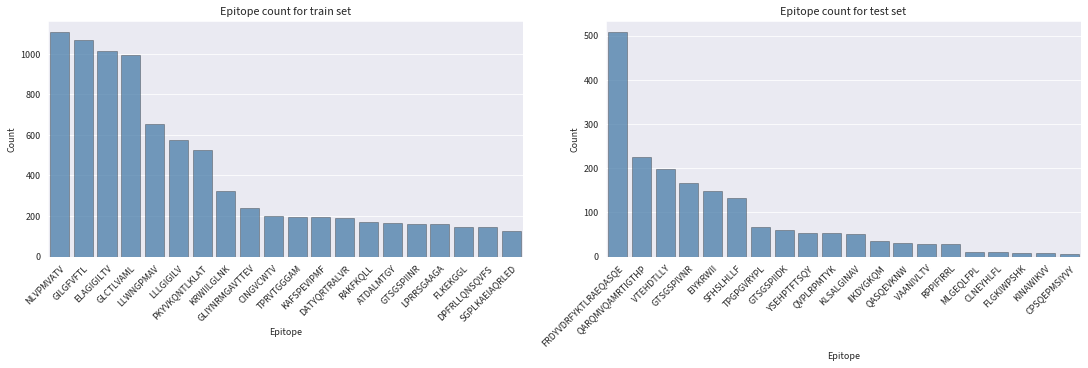

---------------------------------
Iteration 3

Size of train set: 9333
Size of test set: 3196
Train to test ratio: 0.74 : 0.26 
Unique epitopes in train set: 130
Unique epitopes in test set: 33


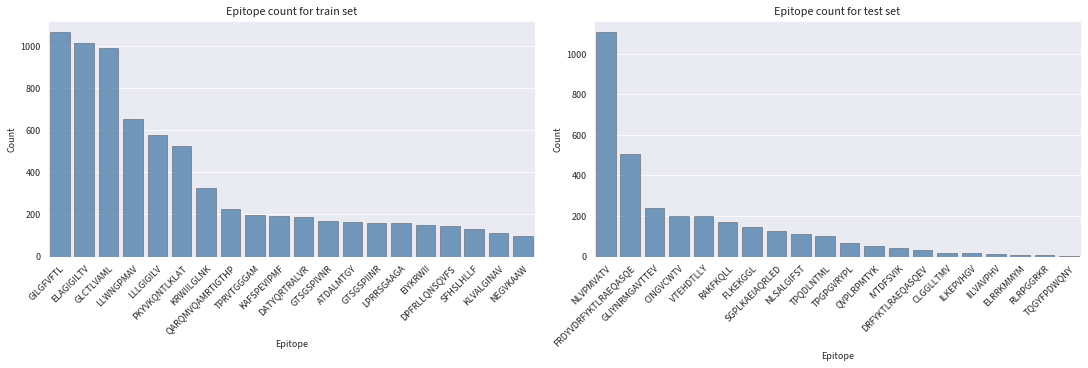

---------------------------------
Iteration 4

Size of train set: 10498
Size of test set: 2031
Train to test ratio: 0.84 : 0.16 
Unique epitopes in train set: 130
Unique epitopes in test set: 33


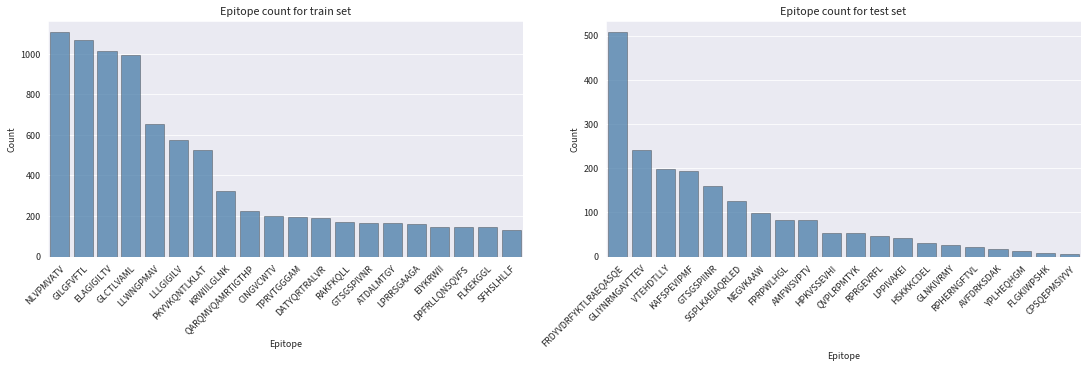

---------------------------------
Iteration 5

Size of train set: 11161
Size of test set: 1368
Train to test ratio: 0.89 : 0.11 
Unique epitopes in train set: 130
Unique epitopes in test set: 33


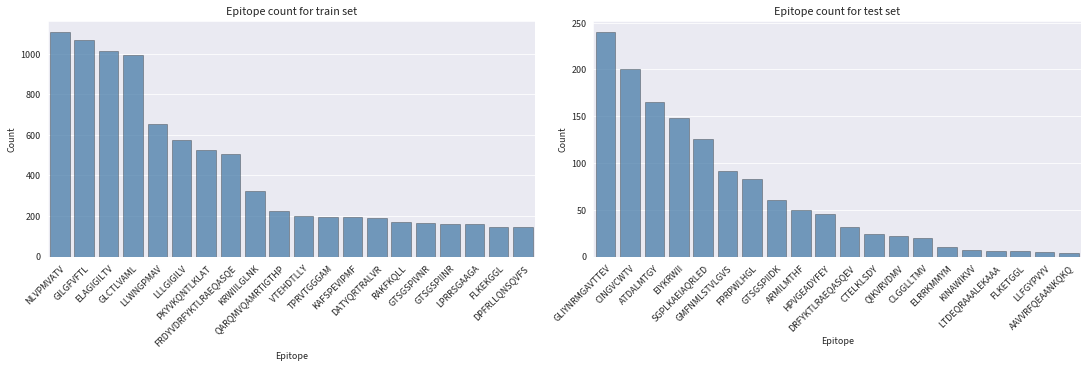

---------------------------------
Iteration 6

Size of train set: 10636
Size of test set: 1893
Train to test ratio: 0.85 : 0.15 
Unique epitopes in train set: 130
Unique epitopes in test set: 33


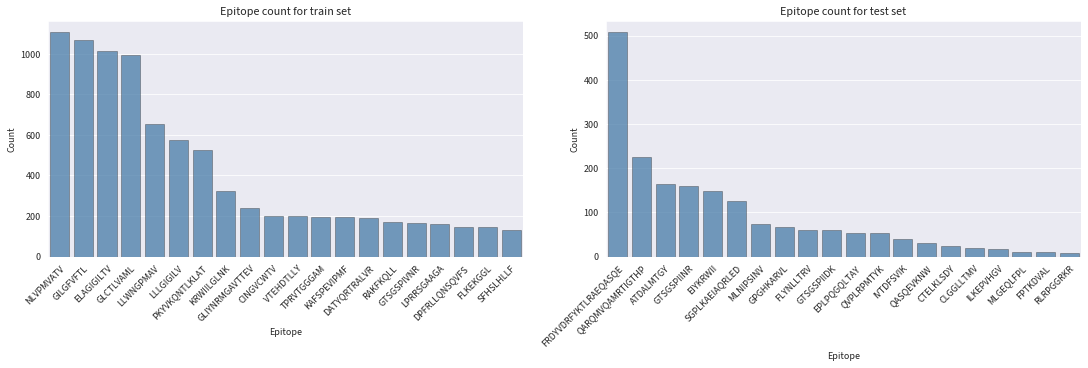

---------------------------------
Iteration 7

Size of train set: 9342
Size of test set: 3187
Train to test ratio: 0.75 : 0.25 
Unique epitopes in train set: 130
Unique epitopes in test set: 33


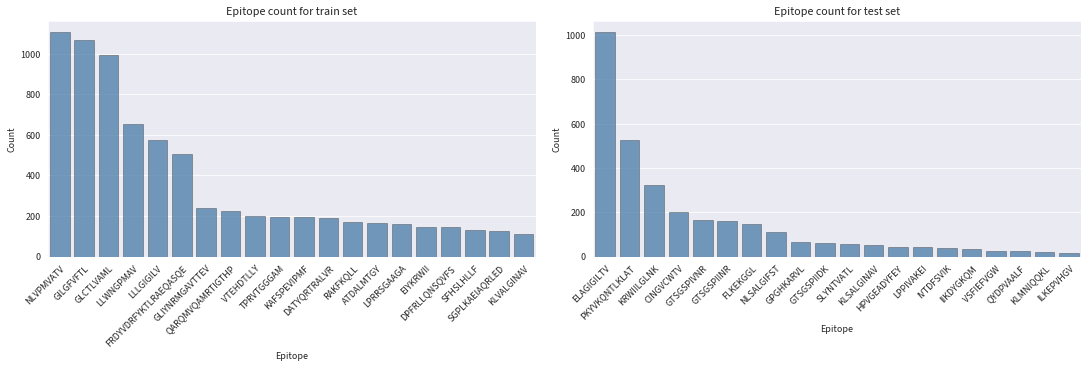

---------------------------------
Iteration 8

Size of train set: 9692
Size of test set: 2837
Train to test ratio: 0.77 : 0.23 
Unique epitopes in train set: 130
Unique epitopes in test set: 33


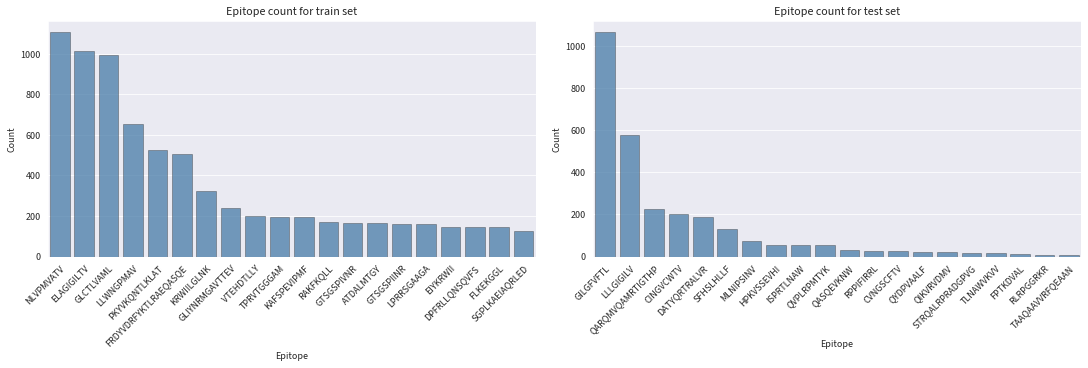

---------------------------------
Iteration 9

Size of train set: 10093
Size of test set: 2436
Train to test ratio: 0.81 : 0.19 
Unique epitopes in train set: 130
Unique epitopes in test set: 33


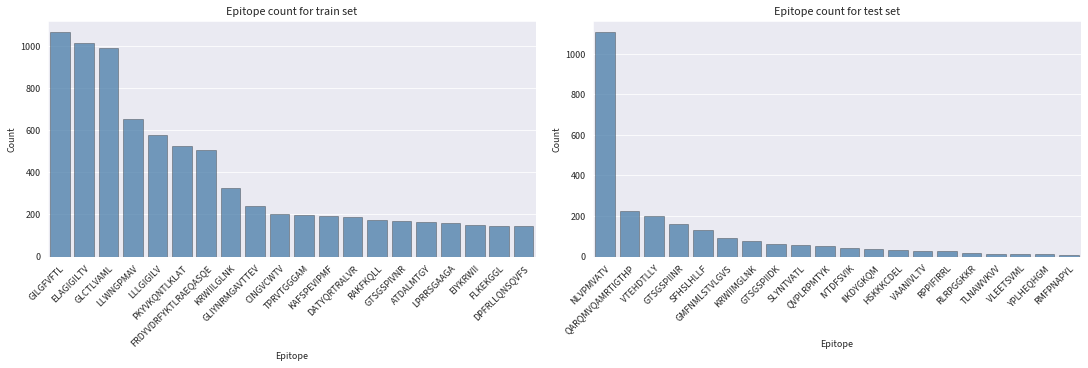

---------------------------------


In [35]:
k = 10
group_shuffle_10_sub = GroupShuffleSplit(n_splits=k)
print(f"Using a Group Shuffle Split (k = {k}) cross-validation strategy with the following settings:\n{group_shuffle_10_sub}")

fold_indices_shuffle_10_sub = [(train_index, test_index) for train_index, test_index in group_shuffle_10_sub.split(df_sub.index, groups=df_sub["antigen.epitope"])]

for iteration, (train_index, test_index) in enumerate(fold_indices_shuffle_10_sub):
    fold_analysis(iteration, train_index, test_index, df_sub, plot=True)   

# Overall comparison

## K vs Shuffle vs Group vs Group Shuffle

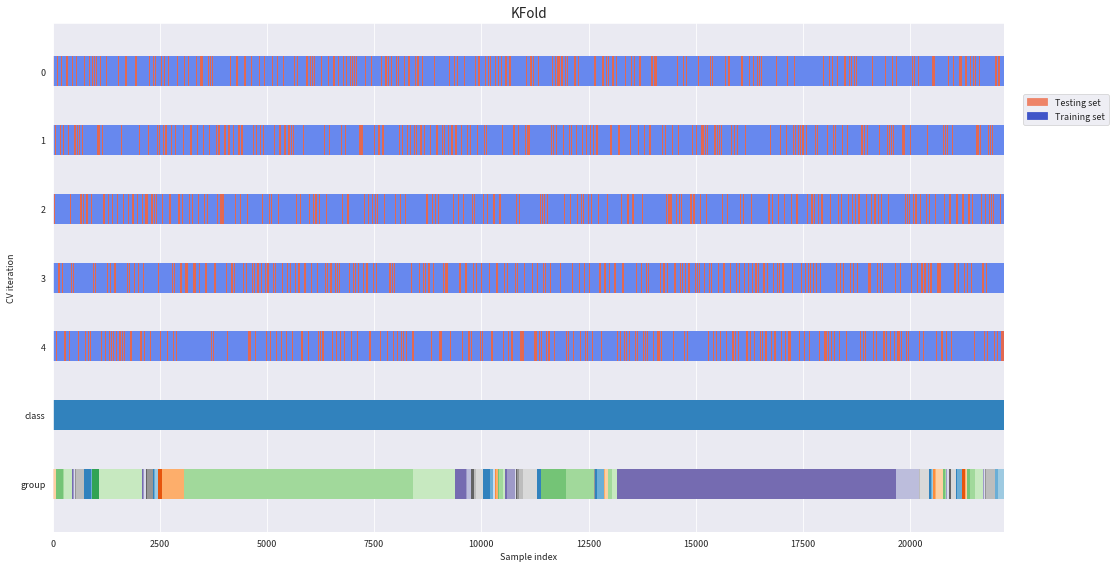

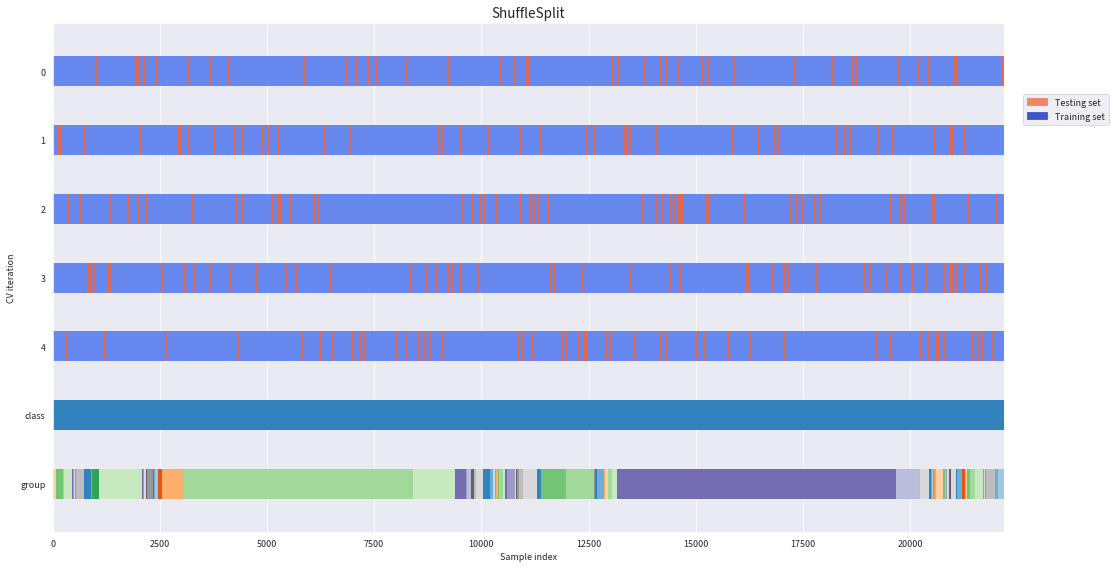

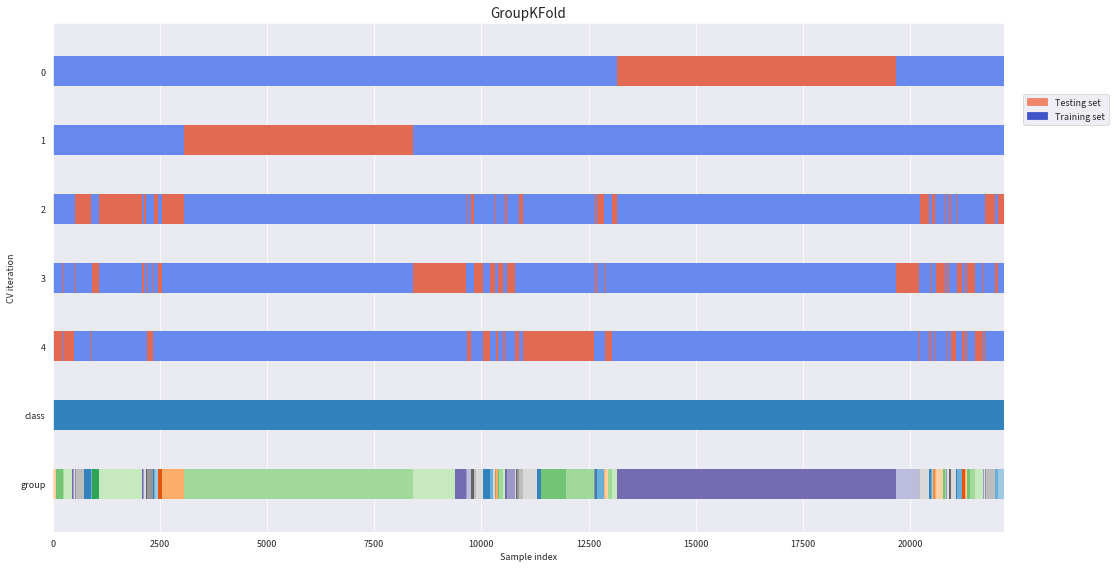

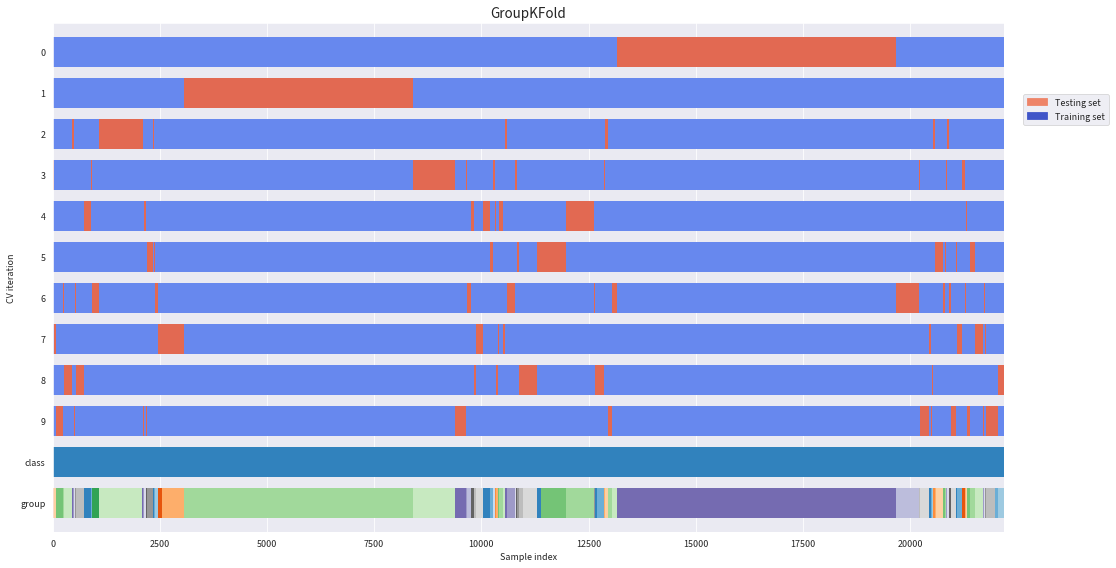

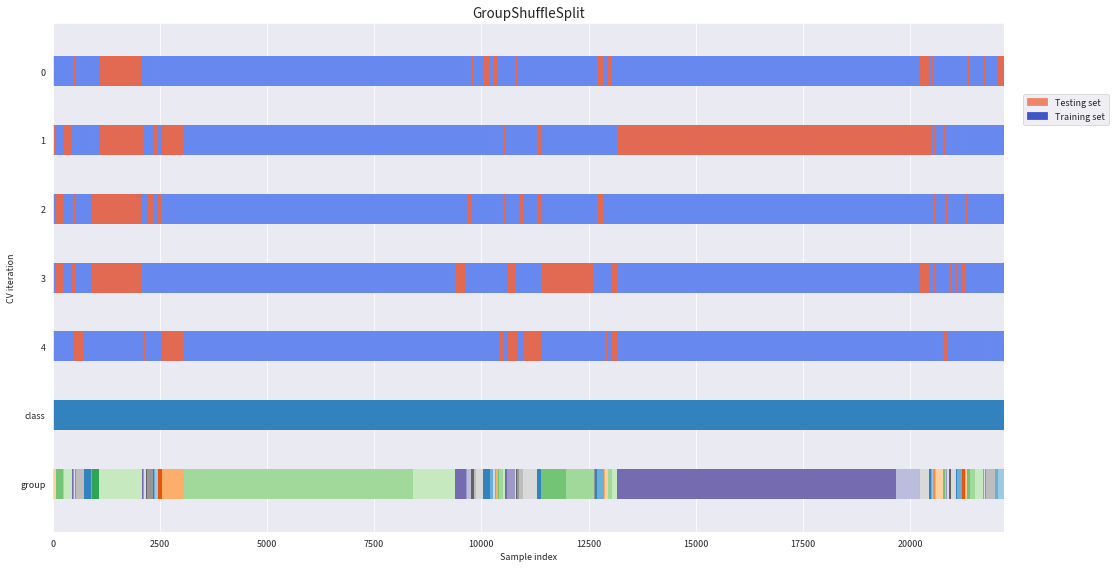

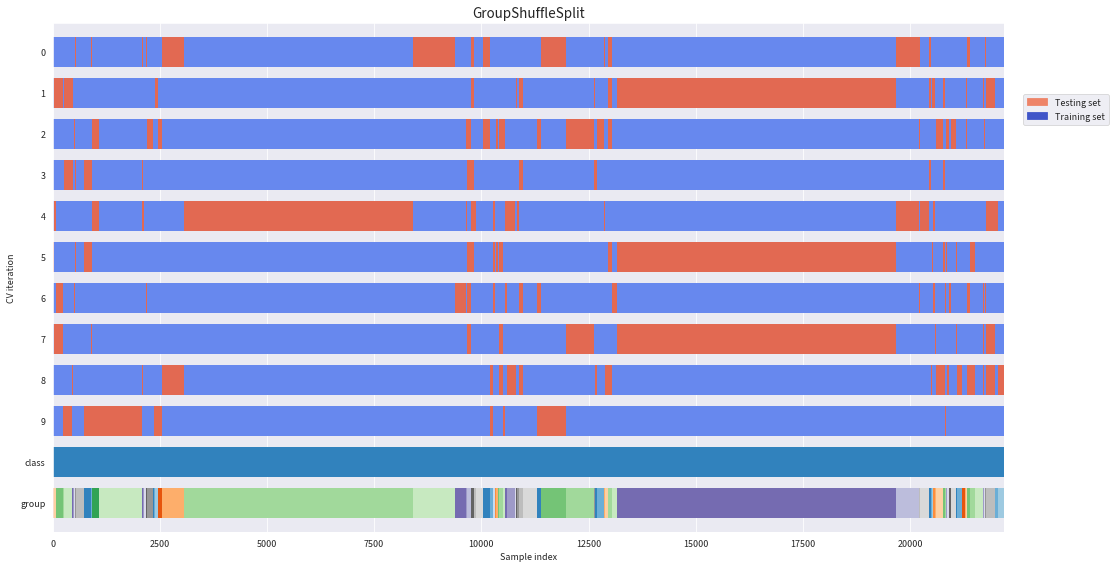

In [40]:
cvs = [(KFold, 5), (ShuffleSplit, 5),
       (GroupKFold, 5), (GroupKFold, 10), 
       (GroupShuffleSplit, 5), (GroupShuffleSplit, 10)]
#        (LeaveOneGroupOut, None)]

X = df.index
y = np.array([1 for _ in range(df.shape[0])])
groups = pd.factorize(df["antigen.epitope"])[0]

for cv, n_splits in cvs:
    
    if cv == KFold:
        this_cv = cv(n_splits=n_splits, shuffle=True)
#     elif cv == LeaveOneGroupOut:
#         this_cv = cv()
#         n_splits = len(groups)
    else:
        this_cv = cv(n_splits=n_splits)
    
    fig, ax = plt.subplots(figsize=(20, 8))
    plot_cv_indices_epitope(this_cv, X, y, groups, ax, n_splits)

    ax.legend([Patch(color=cmap_cv(.8)), Patch(color=cmap_cv(.02))],
              ['Testing set', 'Training set'], loc=(1.02, .8))
    # Make the legend fit
    plt.tight_layout()
    fig.subplots_adjust(right=.7)
plt.show()

## Group K Fold and down sampling

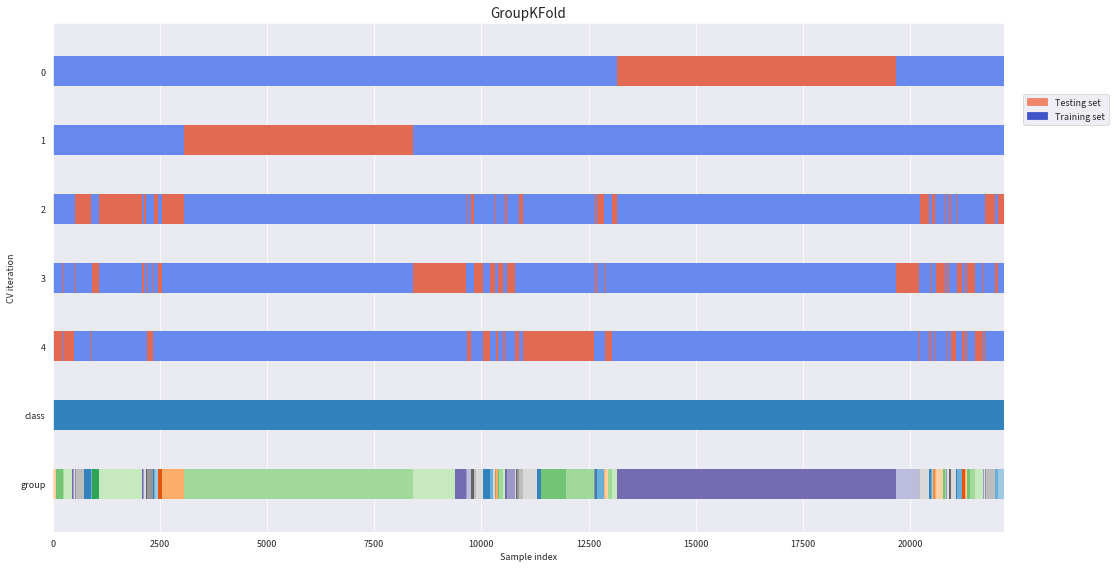

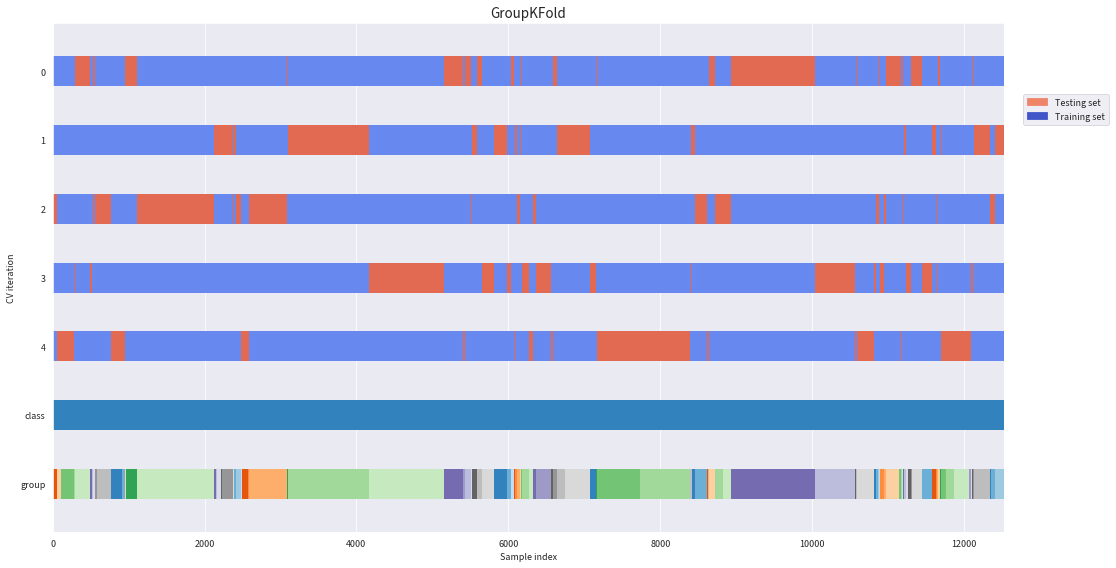

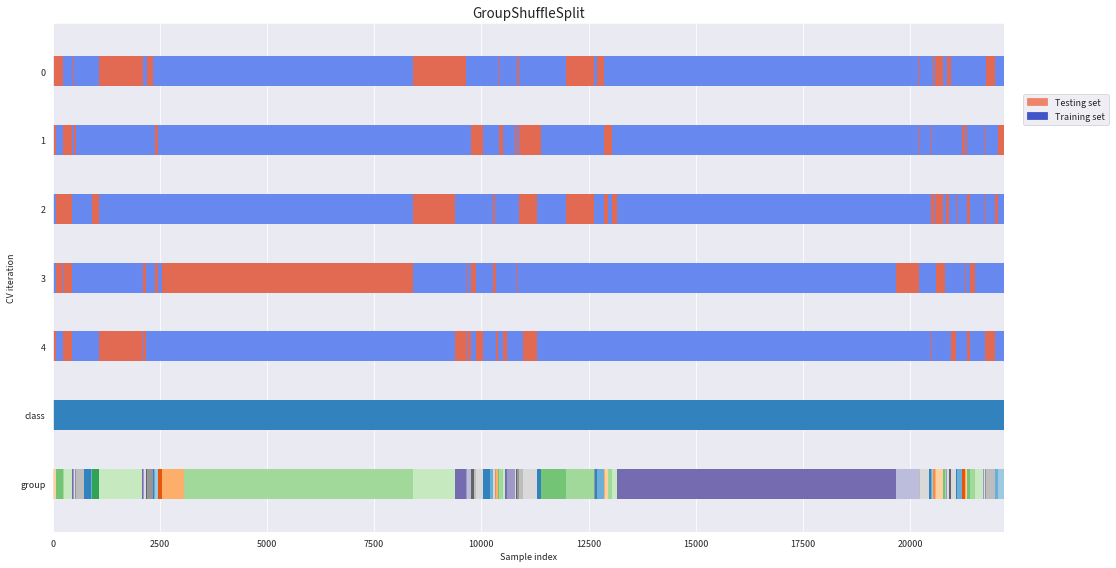

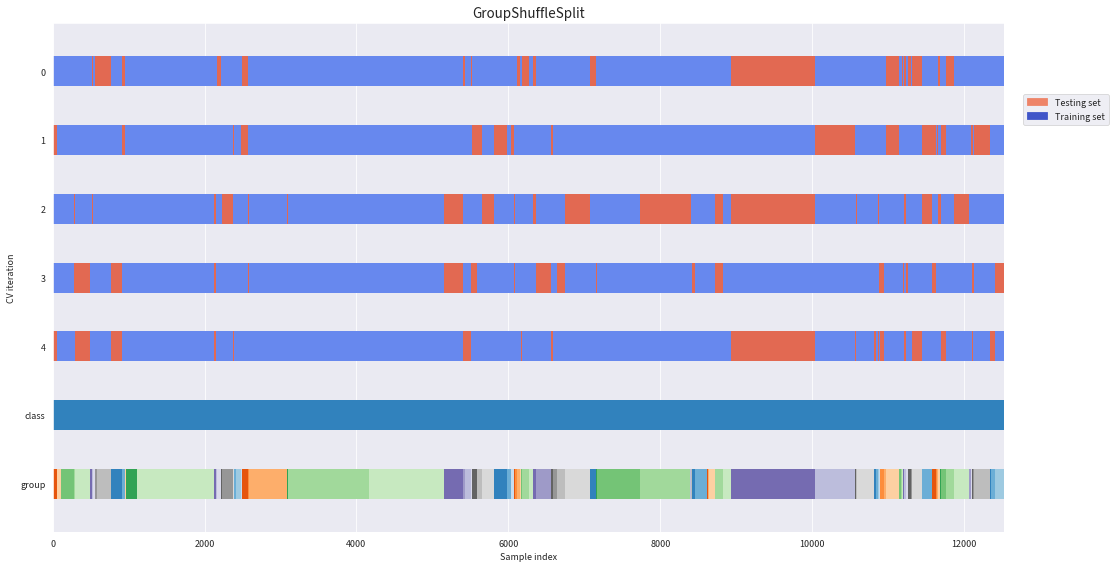

In [44]:
cvs = [(GroupKFold, 5, df), (GroupKFold, 5, df_sub), 
       (GroupShuffleSplit, 5, df), (GroupShuffleSplit, 5, df_sub)]

for cv, n_splits, data in cvs:
    
    X = data.index
    y = np.array([1 for _ in range(data.shape[0])])
    groups = pd.factorize(data["antigen.epitope"])[0]

    this_cv = cv(n_splits=n_splits)
    
    fig, ax = plt.subplots(figsize=(20, 8))
    plot_cv_indices_epitope(this_cv, X, y, groups, ax, n_splits)

    ax.legend([Patch(color=cmap_cv(.8)), Patch(color=cmap_cv(.02))],
              ['Testing set', 'Training set'], loc=(1.02, .8))
    # Make the legend fit
    plt.tight_layout()
    fig.subplots_adjust(right=.7)
plt.show()